**<P-199 – Stock market Analysis >**

**Business Objective:** 

Predict the Reliance Industries Stock Price for the next 30 days.
There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 2015 to 2022 for Reliance Industries stock.

●	Split the last year into a test set- to build a model to predict stock price.

●	Find short term, & long term trends.

●	Understand how it is impacted from external factors or any big external events.

●	Forecast for next 30 days.










In [ ]:
import pandas as  pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install nsepy
from nsepy import get_history
from datetime import date

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36085 sha256=21daf6ec81554245b5d76ca83580272618457891128de8c48d7759d3ffca404c
  Stored in directory: /root/.cache/pip/wheels/50/12/d5/bbea58569f0c28fa7a6cb72cc76303ecd20d40c977742486df
Successfully built nsepy


In [ ]:
start_date=date(2015,1,1)
end_date=date(2023,2,15)

reliance=get_history(symbol="RELIANCE",start=start_date,end=end_date)
print(reliance)

              Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                          
2015-01-01  RELIANCE     EQ      891.15   886.30   892.00   883.65   888.00   
2015-01-02  RELIANCE     EQ      887.90   888.10   896.05   884.30   884.95   
2015-01-05  RELIANCE     EQ      885.55   885.00   890.90   874.10   875.55   
2015-01-06  RELIANCE     EQ      875.85   870.00   873.00   832.00   832.50   
2015-01-07  RELIANCE     EQ      836.10   837.10   858.80   837.00   858.00   
...              ...    ...         ...      ...      ...      ...      ...   
2023-02-09  RELIANCE     EQ     2351.95  2353.45  2370.85  2334.00  2353.60   
2023-02-10  RELIANCE     EQ     2356.05  2354.90  2354.90  2321.30  2336.50   
2023-02-13  RELIANCE     EQ     2336.65  2340.20  2350.00  2313.55  2324.60   
2023-02-14  RELIANCE     EQ     2323.35  2329.95  2381.90  2323.65  2380.00   
2023-02-15  RELIANCE     EQ     2378.10  2376.00  24

In [ ]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2014 entries, 2015-01-01 to 2023-02-15
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2014 non-null   object 
 1   Series              2014 non-null   object 
 2   Prev Close          2014 non-null   float64
 3   Open                2014 non-null   float64
 4   High                2014 non-null   float64
 5   Low                 2014 non-null   float64
 6   Last                2014 non-null   float64
 7   Close               2014 non-null   float64
 8   VWAP                2014 non-null   float64
 9   Volume              2014 non-null   int64  
 10  Turnover            2014 non-null   float64
 11  Trades              2014 non-null   int64  
 12  Deliverable Volume  2014 non-null   int64  
 13  %Deliverble         2014 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 236.0+ KB


In [ ]:
reliance.head()

Symbol Series  Prev Close   Open    High     Low    Last  \
Date                                                                     
2015-01-01  RELIANCE     EQ      891.15  886.3  892.00  883.65  888.00   
2015-01-02  RELIANCE     EQ      887.90  888.1  896.05  884.30  884.95   
2015-01-05  RELIANCE     EQ      885.55  885.0  890.90  874.10  875.55   
2015-01-06  RELIANCE     EQ      875.85  870.0  873.00  832.00  832.50   
2015-01-07  RELIANCE     EQ      836.10  837.1  858.80  837.00  858.00   

             Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                            
2015-01-01  887.90  887.62   677439  6.013059e+13   16263              286377   
2015-01-02  885.55  889.39  1675827  1.490461e+14   31269             1048543   
2015-01-05  875.85  881.88  2309591  2.036781e+14   67035             1393132   
2015-01-06  836.10  847.60  4258043  3.609133e+14  120767             2353273   
2015-01-07  854.30  849.81  4736315  4.024972e+14  125939             2885468   

            %Deliverble  
Date                     
2015-01-01       0.4227  
2015-01-02       0.6257  
2015-01-05       0.6032  
2015-01-06       0.5527  
2015-01-07       0.6092

In [ ]:
reliance.tail()

Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                          
2023-02-09  RELIANCE     EQ     2351.95  2353.45  2370.85  2334.00  2353.60   
2023-02-10  RELIANCE     EQ     2356.05  2354.90  2354.90  2321.30  2336.50   
2023-02-13  RELIANCE     EQ     2336.65  2340.20  2350.00  2313.55  2324.60   
2023-02-14  RELIANCE     EQ     2323.35  2329.95  2381.90  2323.65  2380.00   
2023-02-15  RELIANCE     EQ     2378.10  2376.00  2437.20  2373.00  2435.05   

              Close     VWAP    Volume      Turnover  Trades  \
Date                                                           
2023-02-09  2356.05  2354.91   6079228  1.431601e+15  264097   
2023-02-10  2336.65  2331.77   4979789  1.161172e+15  188258   
2023-02-13  2323.35  2323.49   4777674  1.110088e+15  151763   
2023-02-14  2378.10  2365.58   6609564  1.563542e+15  227277   
2023-02-15  2431.95  2417.55  15461902  3.737992e+15  338567   

            Deliverable Volume  %Deliverble  
Date                                         
2023-02-09             3862283       0.6353  
2023-02-10             2634108       0.5290  
2023-02-13             2780205       0.5819  
2023-02-14             4049724       0.6127  
2023-02-15            11644633       0.7531

In [ ]:
reliance.isna()

Symbol  Series  Prev Close   Open   High    Low   Last  Close  \
Date                                                                        
2015-01-01   False   False       False  False  False  False  False  False   
2015-01-02   False   False       False  False  False  False  False  False   
2015-01-05   False   False       False  False  False  False  False  False   
2015-01-06   False   False       False  False  False  False  False  False   
2015-01-07   False   False       False  False  False  False  False  False   
...            ...     ...         ...    ...    ...    ...    ...    ...   
2023-02-09   False   False       False  False  False  False  False  False   
2023-02-10   False   False       False  False  False  False  False  False   
2023-02-13   False   False       False  False  False  False  False  False   
2023-02-14   False   False       False  False  False  False  False  False   
2023-02-15   False   False       False  False  False  False  False  False   

             VWAP  Volume  Turnover  Trades  Deliverable Volume  %Deliverble  
Date                                                                          
2015-01-01  False   False     False   False               False        False  
2015-01-02  False   False     False   False               False        False  
2015-01-05  False   False     False   False               False        False  
2015-01-06  False   False     False   False               False        False  
2015-01-07  False   False     False   False               False        False  
...           ...     ...       ...     ...                 ...          ...  
2023-02-09  False   False     False   False               False        False  
2023-02-10  False   False     False   False               False        False  
2023-02-13  False   False     False   False               False        False  
2023-02-14  False   False     False   False               False        False  
2023-02-15  False   False     False   False               False        False  

[2014 rows x 14 columns]

In [ ]:
print(reliance.isnull().sum())

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


In [ ]:
reliance.dropna(axis=0,inplace=True)

In [ ]:
reliance=reliance.dropna()

In [ ]:
reliance.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
reliance.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                  int64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [ ]:
reliance.describe()

Prev Close         Open         High          Low         Last  \
count  2014.000000  2014.000000  2014.000000  2014.000000  2014.000000   
mean   1510.471102  1512.325919  1529.246549  1494.650571  1511.190094   
std     600.619643   601.394506   607.592648   594.534186   600.763289   
min     780.900000   791.750000   793.400000   779.100000   781.200000   
25%     996.112500   995.925000  1006.475000   986.537500   995.600000   
50%    1281.600000  1285.050000  1296.975000  1272.425000  1282.000000   
75%    2077.075000  2080.750000  2100.362500  2046.312500  2077.575000   
max    2819.850000  2856.150000  2856.150000  2786.100000  2810.000000   

             Close         VWAP        Volume      Turnover        Trades  \
count  2014.000000  2014.000000  2.014000e+03  2.014000e+03  2.014000e+03   
mean   1511.236147  1512.210159  7.725706e+06  1.238188e+15  1.901945e+05   
std     600.811659   601.066917  6.640182e+06  1.261530e+15  1.424240e+05   
min     780.900000   785.510000  2.995110e+05  2.781933e+13  8.723000e+03   
25%     996.375000   996.732500  3.756861e+06  4.096544e+14  9.207650e+04   
50%    1281.750000  1284.395000  5.922312e+06  9.135920e+14  1.582450e+05   
75%    2077.225000  2075.690000  9.296070e+06  1.584912e+15  2.344620e+05   
max    2819.850000  2823.910000  6.523089e+07  1.473434e+16  1.428490e+06   

       Deliverable Volume  %Deliverble  
count        2.014000e+03  2014.000000  
mean         3.347982e+06     0.481031  
std          2.267165e+06     0.123588  
min          9.803000e+04     0.114800  
25%          1.921534e+06     0.399225  
50%          2.779888e+06     0.492250  
75%          4.091049e+06     0.566850  
max          1.973411e+07     0.827000

In [ ]:
reliance.corr()

Prev Close      Open      High       Low      Last  \
Prev Close            1.000000  0.999300  0.998909  0.998910  0.998376   
Open                  0.999300  1.000000  0.999551  0.999552  0.999036   
High                  0.998909  0.999551  1.000000  0.999455  0.999639   
Low                   0.998910  0.999552  0.999455  1.000000  0.999584   
Last                  0.998376  0.999036  0.999639  0.999584  1.000000   
Close                 0.998408  0.999061  0.999654  0.999609  0.999988   
VWAP                  0.998893  0.999537  0.999851  0.999808  0.999824   
Volume                0.170629  0.172747  0.184528  0.163898  0.175692   
Turnover              0.461425  0.463720  0.474013  0.455694  0.466020   
Trades                0.412574  0.413794  0.424023  0.403306  0.413835   
Deliverable Volume    0.149099  0.148947  0.158162  0.140281  0.149935   
%Deliverble          -0.139488 -0.142268 -0.148272 -0.139204 -0.145057   

                       Close      VWAP    Volume  Turnover    Trades  \
Prev Close          0.998408  0.998893  0.170629  0.461425  0.412574   
Open                0.999061  0.999537  0.172747  0.463720  0.413794   
High                0.999654  0.999851  0.184528  0.474013  0.424023   
Low                 0.999609  0.999808  0.163898  0.455694  0.403306   
Last                0.999988  0.999824  0.175692  0.466020  0.413835   
Close               1.000000  0.999848  0.175297  0.465703  0.413497   
VWAP                0.999848  1.000000  0.175220  0.465866  0.414145   
Volume              0.175297  0.175220  1.000000  0.918919  0.913372   
Turnover            0.465703  0.465866  0.918919  1.000000  0.927628   
Trades              0.413497  0.414145  0.913372  0.927628  1.000000   
Deliverable Volume  0.149647  0.149553  0.836596  0.728441  0.757118   
%Deliverble        -0.144787 -0.144749 -0.444854 -0.437703 -0.419716   

                    Deliverable Volume  %Deliverble  
Prev Close                    0.149099    -0.139488  
Open                          0.148947    -0.142268  
High                          0.158162    -0.148272  
Low                           0.140281    -0.139204  
Last                          0.149935    -0.145057  
Close                         0.149647    -0.144787  
VWAP                          0.149553    -0.144749  
Volume                        0.836596    -0.444854  
Turnover                      0.728441    -0.437703  
Trades                        0.757118    -0.419716  
Deliverable Volume            1.000000    -0.040608  
%Deliverble                  -0.040608     1.000000

In [ ]:
import plotly.graph_objects as go
figcandle = go.Figure(data=[go.Candlestick(open=reliance['Open'], high=reliance['High'],
                low=reliance['Low'], close=reliance['Close'])])

figcandle.update_layout(xaxis_rangeslider_visible=False)
figcandle.show()

In [ ]:
#boxplot visualization
Q1=reliance.quantile(0.25)
Q3=reliance.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Prev Close            1.080962e+03
Open                  1.084825e+03
High                  1.093888e+03
Low                   1.059775e+03
Last                  1.081975e+03
Close                 1.080850e+03
VWAP                  1.078957e+03
Volume                5.539208e+06
Turnover              1.175258e+15
Trades                1.423855e+05
Deliverable Volume    2.169515e+06
%Deliverble           1.676250e-01
dtype: float64


<AxesSubplot:xlabel='Prev Close'>

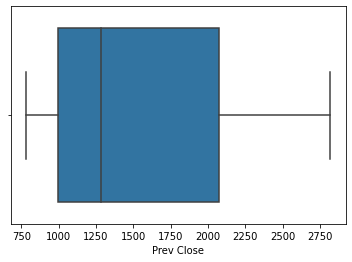

In [ ]:
sns.boxplot(x=reliance['Prev Close'])

<AxesSubplot:xlabel='Open'>

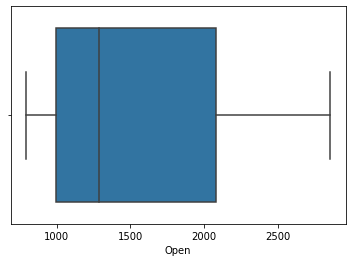

In [ ]:
sns.boxplot(x=reliance['Open'])

<AxesSubplot:xlabel='High'>

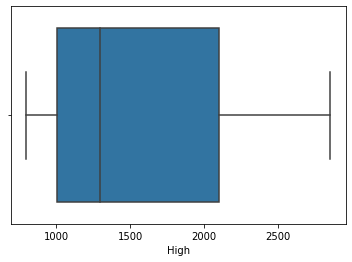

In [ ]:
sns.boxplot(x=reliance['High'])

<AxesSubplot:xlabel='Low'>

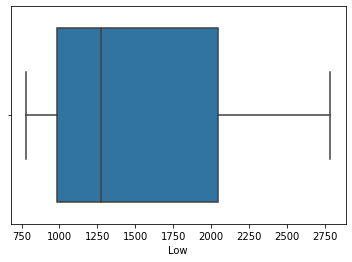

In [ ]:
sns.boxplot(x=reliance['Low'])

<AxesSubplot:xlabel='Last'>

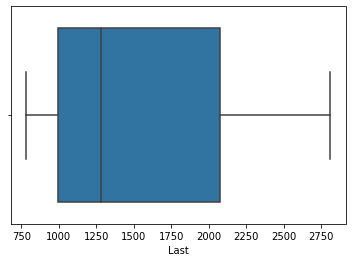

In [ ]:
sns.boxplot(x=reliance['Last'])

<AxesSubplot:xlabel='Close'>

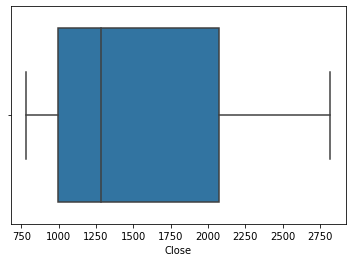

In [ ]:
sns.boxplot(x=reliance['Close'])

<AxesSubplot:xlabel='VWAP'>

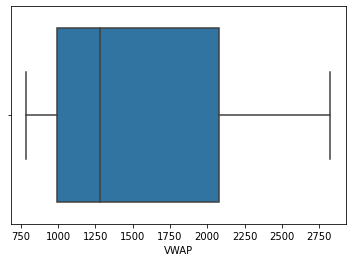

In [ ]:
sns.boxplot(x=reliance['VWAP'])

<AxesSubplot:xlabel='Volume'>

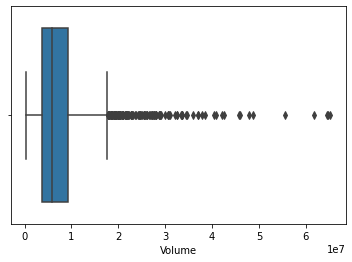

In [ ]:
sns.boxplot(x=reliance['Volume'])

<AxesSubplot:xlabel='Turnover'>

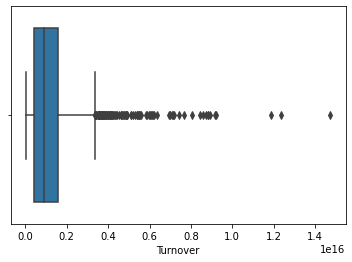

In [ ]:
sns.boxplot(x=reliance['Turnover'])

<AxesSubplot:xlabel='Trades'>

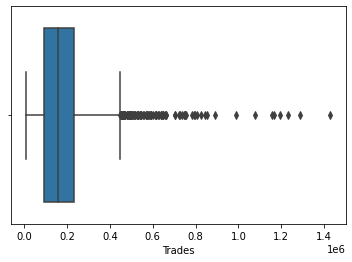

In [ ]:
sns.boxplot(x=reliance['Trades'])

<AxesSubplot:xlabel='Deliverable Volume'>

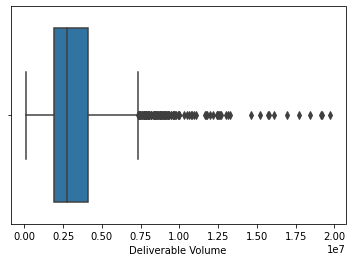

In [ ]:
sns.boxplot(x=reliance['Deliverable Volume'])

<AxesSubplot:xlabel='%Deliverble'>

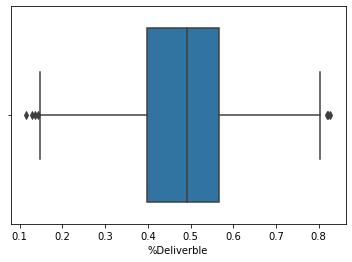

In [ ]:
sns.boxplot(x=reliance['%Deliverble'])

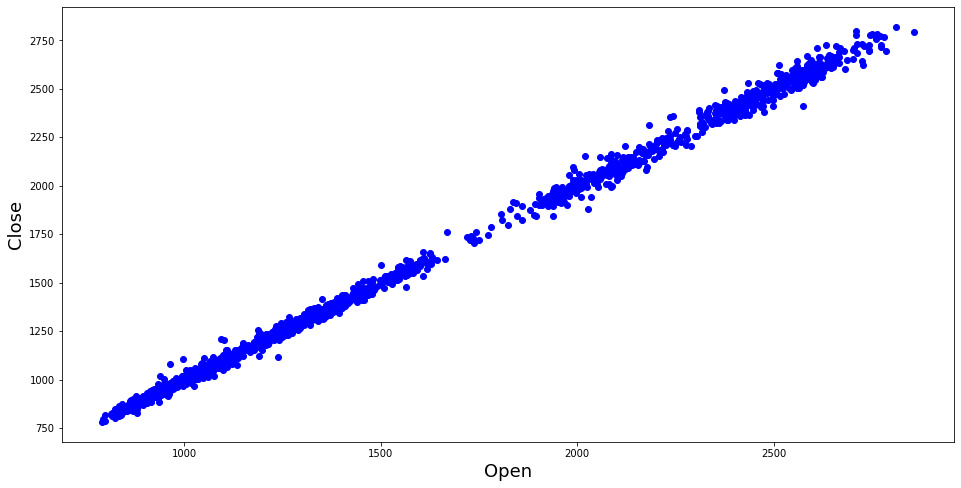

In [ ]:
#scatterplot
plt.figure(figsize=(16,8))
plt.title=('Price history')
plt.scatter(x=reliance['Open'],y=reliance['Close'],color='blue')
plt.xlabel('Open',fontsize=18) 
plt.ylabel('Close',fontsize=18)
plt.show()

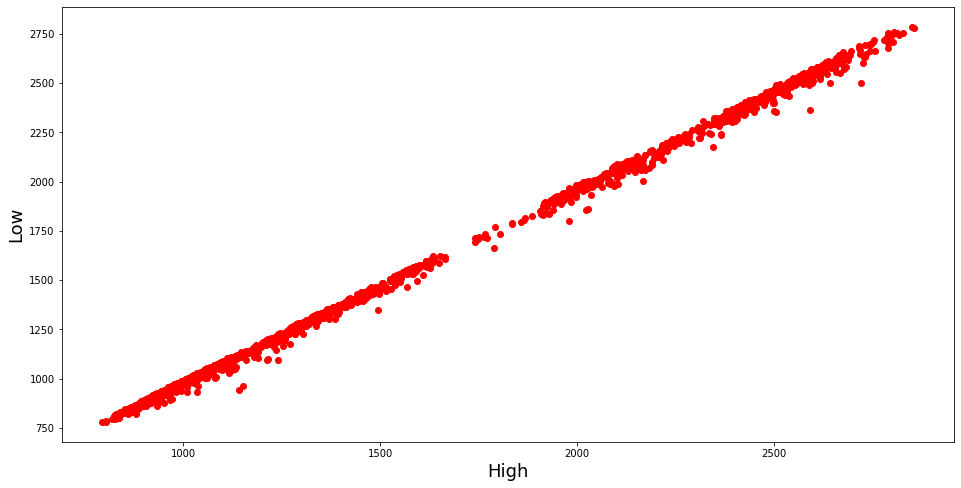

In [ ]:
#scatterplot
plt.figure(figsize=(16,8))
plt.title=('Price history')
plt.scatter(x=reliance['High'],y=reliance['Low'],color='red')
plt.xlabel('High',fontsize=18) 
plt.ylabel('Low',fontsize=18)
plt.show()

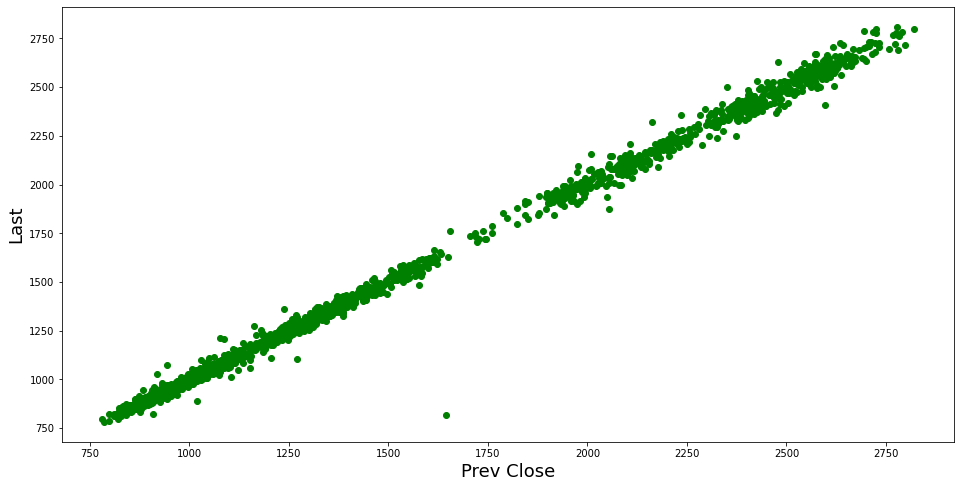

In [ ]:
#scatterplot
plt.figure(figsize=(16,8))
plt.title=('Price history')
plt.scatter(x=reliance['Prev Close'],y=reliance['Last'],color='green')
plt.xlabel('Prev Close',fontsize=18) 
plt.ylabel('Last',fontsize=18)
plt.show()

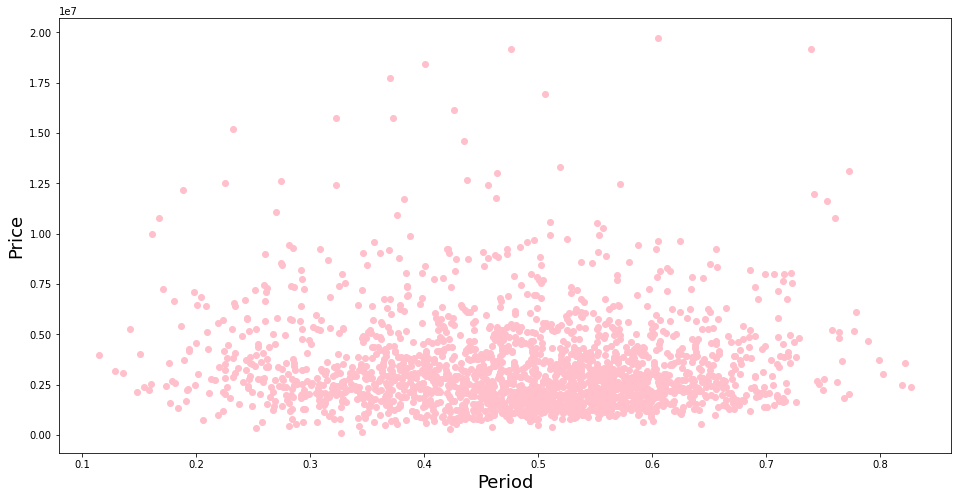

In [ ]:
plt.figure(figsize=(16,8))
plt.title=('Price history')
plt.scatter(x=reliance['%Deliverble'],y=reliance['Deliverable Volume'],color='pink')
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Price',fontsize=18)
plt.show()

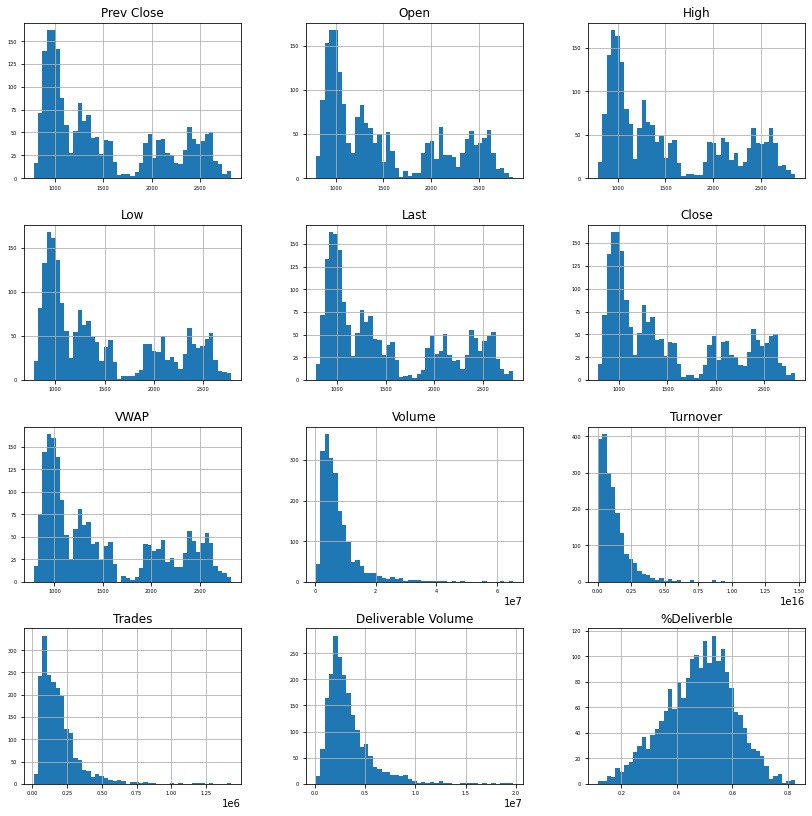

In [ ]:
#histogram
reliance.hist(figsize=(14,14),bins=45,xlabelsize=5,ylabelsize=5);

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



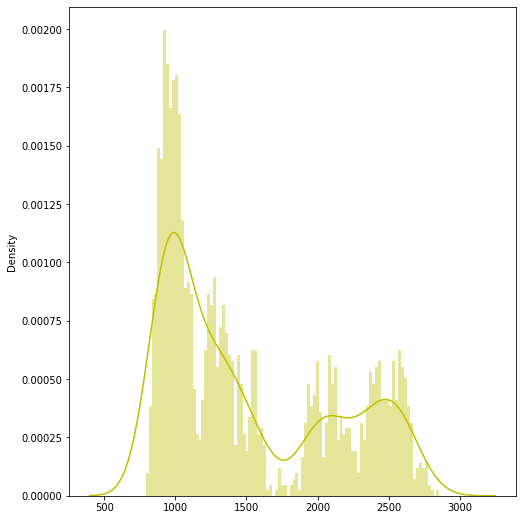

In [ ]:
#Distribution plot
plt.figure(figsize=(8,9))
sns.distplot(reliance[['Open']],color='y', bins=100,hist_kws={'alpha':0.4});
plt.show()
import warnings
warnings.filterwarnings('ignore')

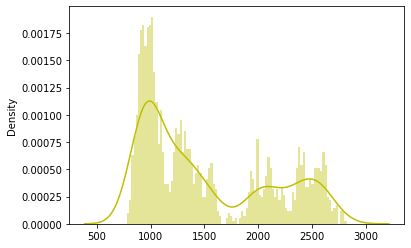

In [ ]:
sns.distplot(reliance[['Close']],color='y', bins=100,hist_kws={'alpha':0.4});
plt.show()

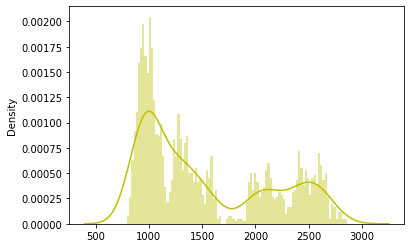

In [ ]:
sns.distplot(reliance[['High']],color='y', bins=100,hist_kws={'alpha':0.4});
plt.show()

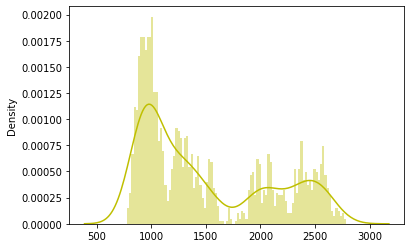

In [ ]:
sns.distplot(reliance[['Low']],color='y', bins=100,hist_kws={'alpha':0.4});
plt.show()

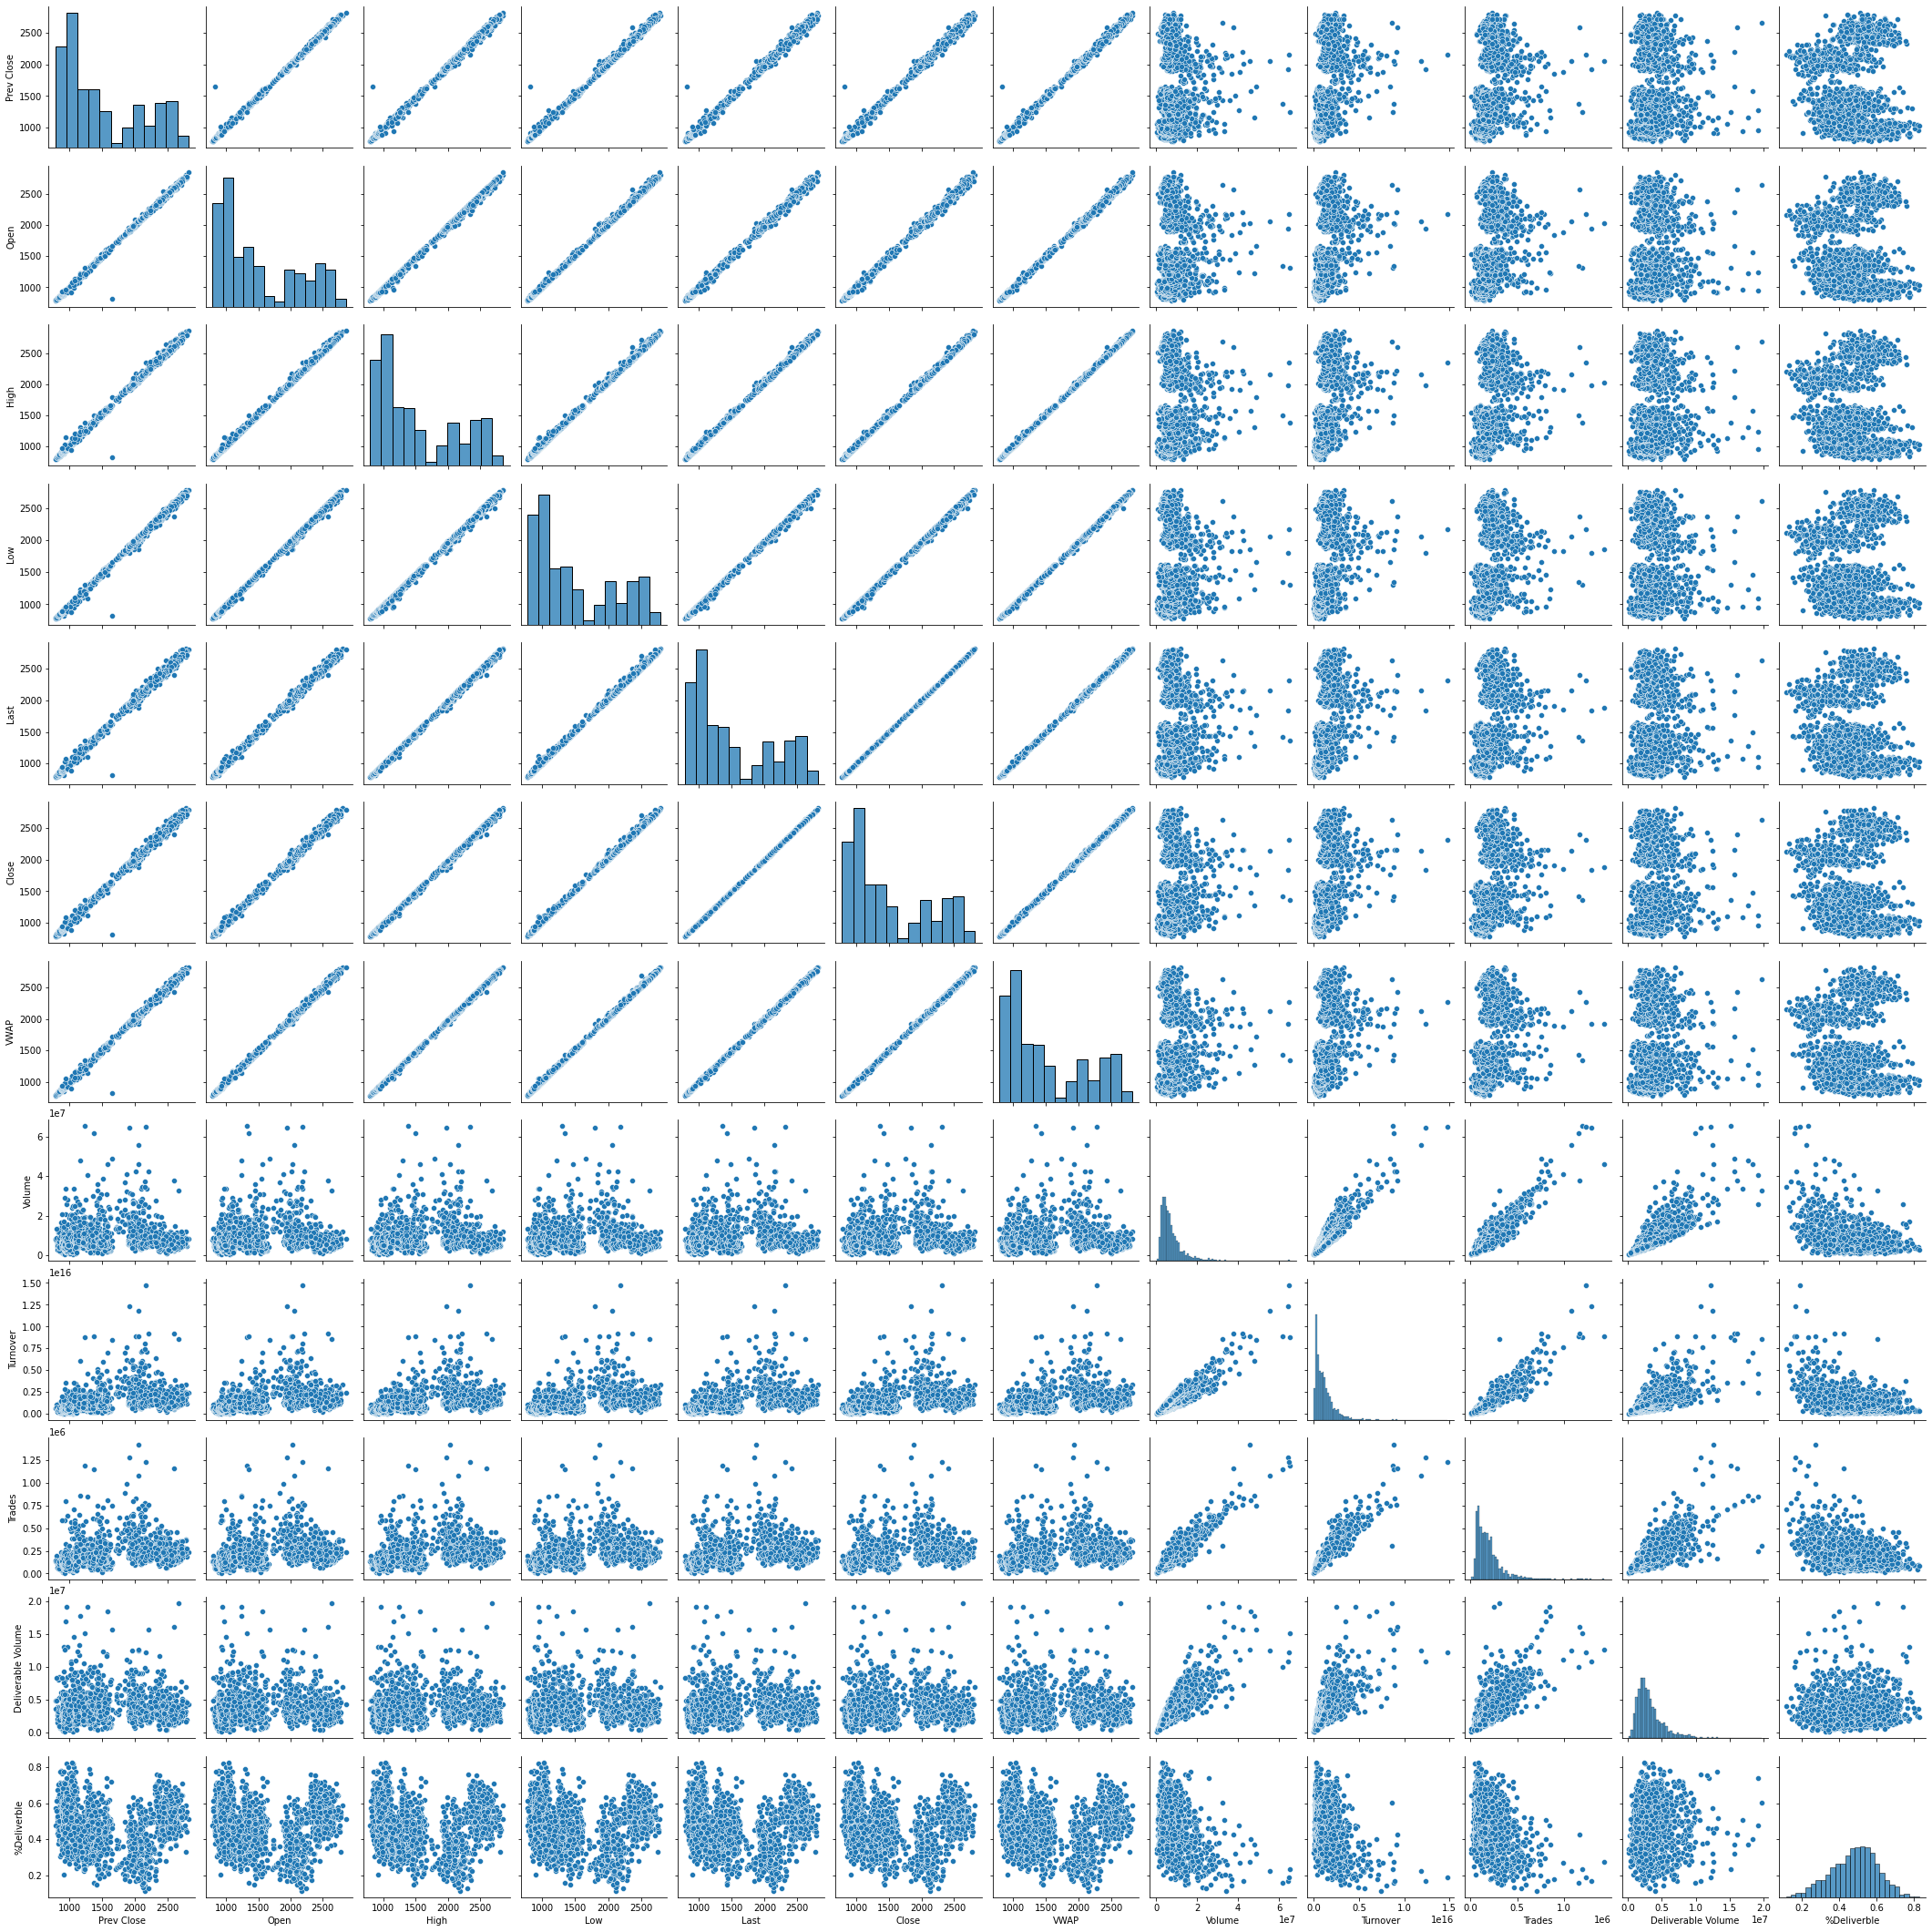

In [ ]:
sns.pairplot(reliance)
plt.show()

Prev Close      Open      High       Low      Last  \
Prev Close            1.000000  0.999300  0.998909  0.998910  0.998376   
Open                  0.999300  1.000000  0.999551  0.999552  0.999036   
High                  0.998909  0.999551  1.000000  0.999455  0.999639   
Low                   0.998910  0.999552  0.999455  1.000000  0.999584   
Last                  0.998376  0.999036  0.999639  0.999584  1.000000   
Close                 0.998408  0.999061  0.999654  0.999609  0.999988   
VWAP                  0.998893  0.999537  0.999851  0.999808  0.999824   
Volume                0.170629  0.172747  0.184528  0.163898  0.175692   
Turnover              0.461425  0.463720  0.474013  0.455694  0.466020   
Trades                0.412574  0.413794  0.424023  0.403306  0.413835   
Deliverable Volume    0.149099  0.148947  0.158162  0.140281  0.149935   
%Deliverble          -0.139488 -0.142268 -0.148272 -0.139204 -0.145057   

                       Close      VWAP    Volume  Turnover    Trades  \
Prev Close          0.998408  0.998893  0.170629  0.461425  0.412574   
Open                0.999061  0.999537  0.172747  0.463720  0.413794   
High                0.999654  0.999851  0.184528  0.474013  0.424023   
Low                 0.999609  0.999808  0.163898  0.455694  0.403306   
Last                0.999988  0.999824  0.175692  0.466020  0.413835   
Close               1.000000  0.999848  0.175297  0.465703  0.413497   
VWAP                0.999848  1.000000  0.175220  0.465866  0.414145   
Volume              0.175297  0.175220  1.000000  0.918919  0.913372   
Turnover            0.465703  0.465866  0.918919  1.000000  0.927628   
Trades              0.413497  0.414145  0.913372  0.927628  1.000000   
Deliverable Volume  0.149647  0.149553  0.836596  0.728441  0.757118   
%Deliverble        -0.144787 -0.144749 -0.444854 -0.437703 -0.419716   

                    Deliverable Volume  %Deliverble  
Prev Close                    0.149099    -0.139488  
Open                          0.148947    -0.142268  
High                          0.158162    -0.148272  
Low                           0.140281    -0.139204  
Last                          0.149935    -0.145057  
Close                         0.149647    -0.144787  
VWAP                          0.149553    -0.144749  
Volume                        0.836596    -0.444854  
Turnover                      0.728441    -0.437703  
Trades                        0.757118    -0.419716  
Deliverable Volume            1.000000    -0.040608  
%Deliverble                  -0.040608     1.000000

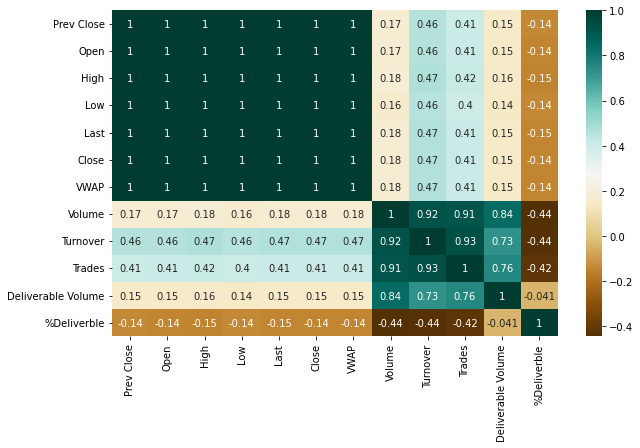

In [ ]:
plt.figure(figsize=(10,6))
c=reliance.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

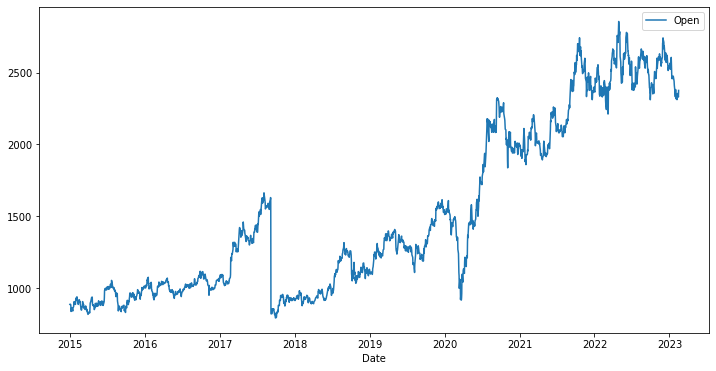

In [ ]:
# Let's see a historical view of the open price
reliance['Open'].plot(legend=True, figsize = (12, 6))
plt.show()

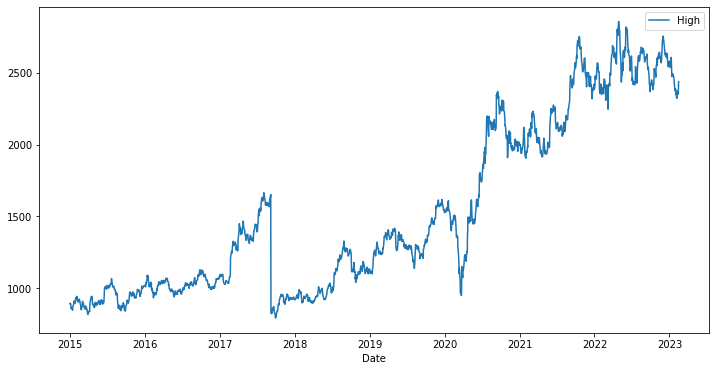

In [ ]:
reliance['High'].plot(legend=True, figsize = (12, 6))
plt.show()

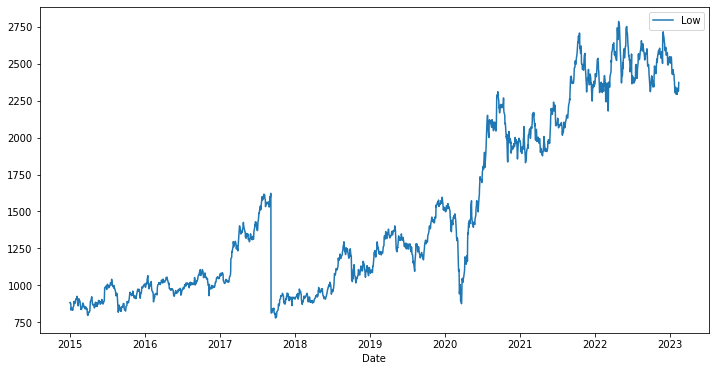

In [ ]:
reliance['Low'].plot(legend=True, figsize = (12, 6))
plt.show()

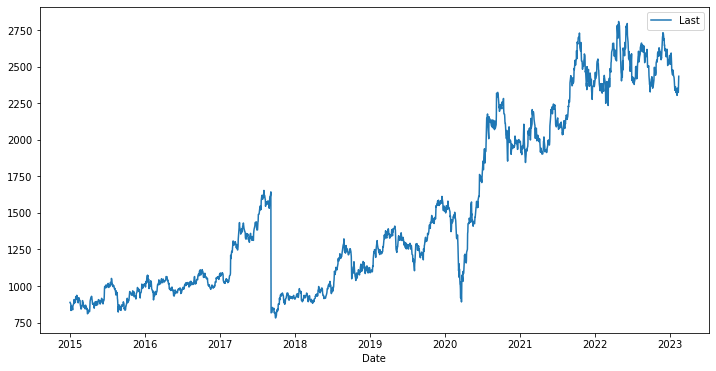

In [ ]:
reliance['Last'].plot(legend=True, figsize = (12, 6))
plt.show()

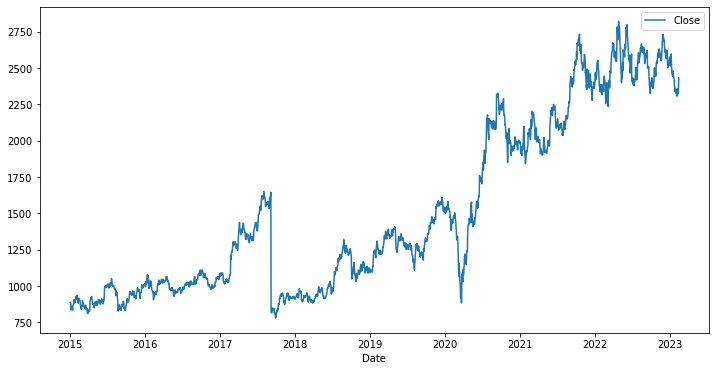

In [ ]:
reliance['Close'].plot(legend=True, figsize = (12, 6))
plt.show()

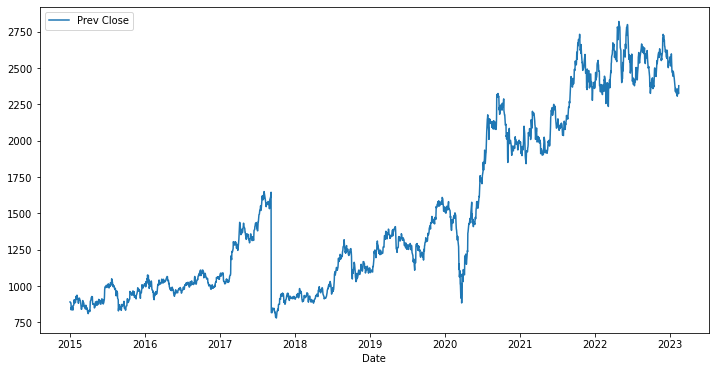

In [ ]:
reliance['Prev Close'].plot(legend=True, figsize = (12, 6))
plt.show()

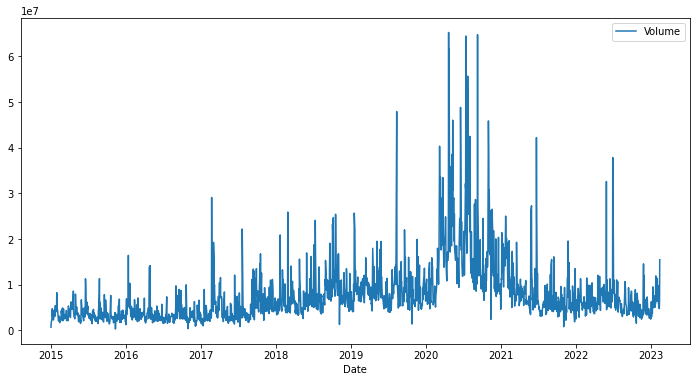

In [ ]:
reliance['Volume'].plot(legend=True, figsize = (12, 6))
plt.show()

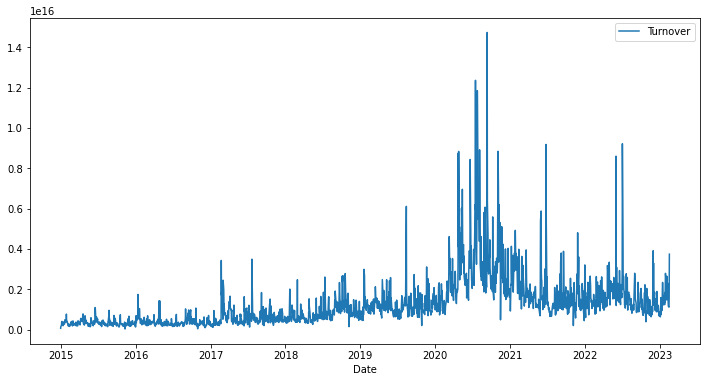

In [ ]:
reliance['Turnover'].plot(legend=True, figsize = (12, 6))
plt.show()

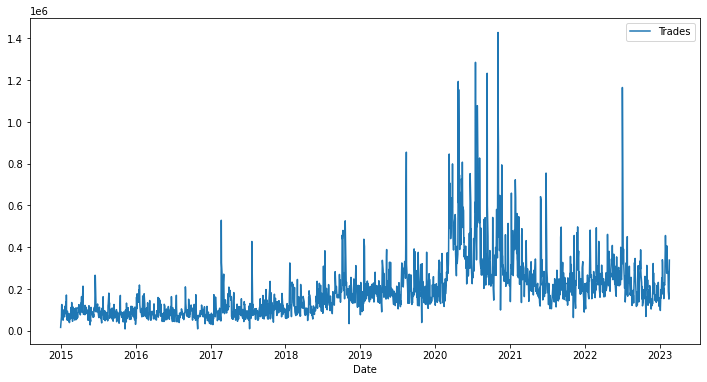

In [ ]:
reliance['Trades'].plot(legend=True, figsize = (12, 6))
plt.show()

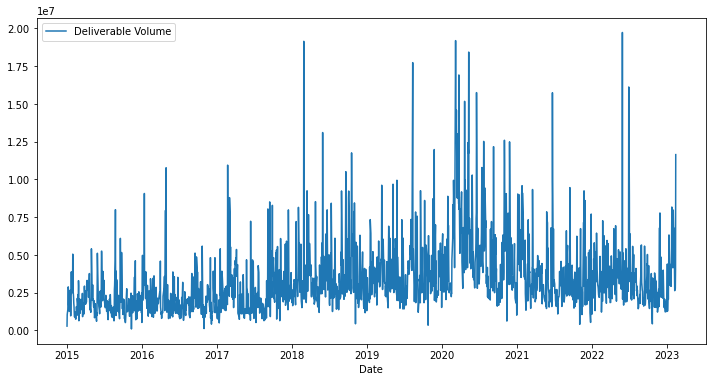

In [ ]:
reliance['Deliverable Volume'].plot(legend=True, figsize = (12, 6))
plt.show()

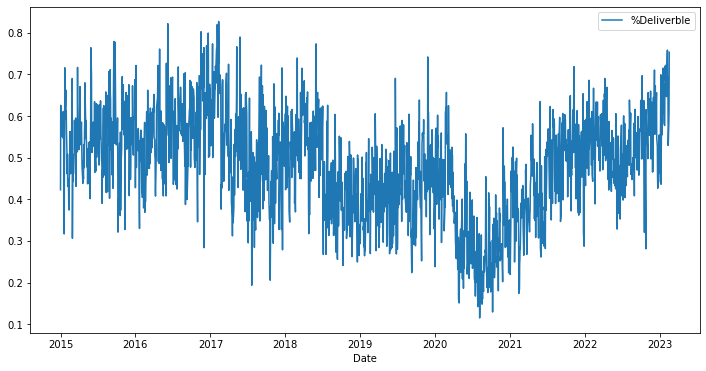

In [ ]:
reliance['%Deliverble'].plot(legend=True, figsize = (12, 6))
plt.show()

'Moving Average - MA'
A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

In [ ]:
from pandas import Series,DataFrame

In [ ]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    reliance[column_name]=pd.DataFrame.rolling(reliance['Close'],ma).mean()

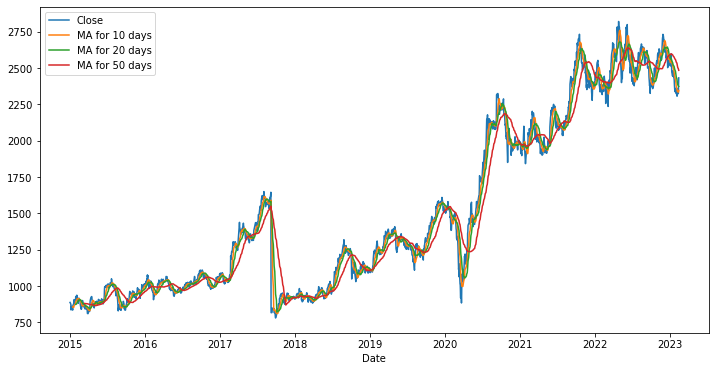

In [ ]:
reliance[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Reliance stock.

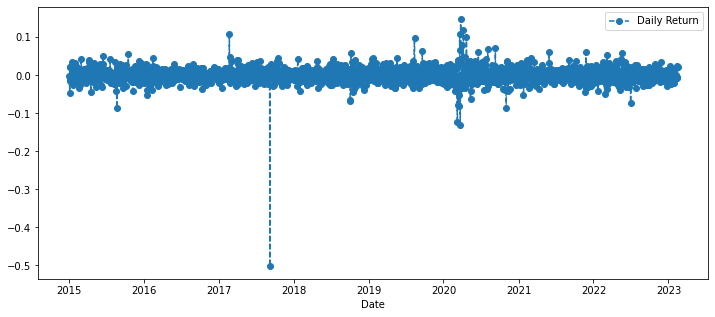

In [ ]:
# use pct_change to find the percent change for each day
reliance['Daily Return'] = reliance['Close'].pct_change()
# plot the daily return percentage
reliance['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

In [ ]:
!pip install pandas-profiling==3.6.6
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
  Attempting uninstall: pandas-profiling
 

In [ ]:
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
EDA_report=pp.ProfileReport(reliance)
EDA_report.to_file(output_file='report2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sweet_report = sv.analyze(reliance)
sweet_report.show_html('Reliance_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Reliance_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# **Decision Tree And Linear Regression Model:**



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
df=reliance[['Close']]
df.head

<bound method NDFrame.head of               Close
Date               
2015-01-01   887.90
2015-01-02   885.55
2015-01-05   875.85
2015-01-06   836.10
2015-01-07   854.30
...             ...
2023-02-09  2356.05
2023-02-10  2336.65
2023-02-13  2323.35
2023-02-14  2378.10
2023-02-15  2431.95

[2014 rows x 1 columns]>

In [ ]:
# Create a variable to predict the 'x'days out in the future
future_days=25
# Create a new column target shifted x units/days up
df['Prediction']=df[['Close']].shift(-future_days)
df.head(4)

Close  Prediction
Date                          
2015-01-01  887.90       909.9
2015-01-02  885.55       896.7
2015-01-05  875.85       882.0
2015-01-06  836.10       900.7

In [ ]:
df.tail(4)

Close  Prediction
Date                           
2023-02-10  2336.65         NaN
2023-02-13  2323.35         NaN
2023-02-14  2378.10         NaN
2023-02-15  2431.95         NaN

In [ ]:
# Create the future data set (X) and convert it into numpy array and remove the last x rows/days
X1=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X1)

[[ 887.9 ]
 [ 885.55]
 [ 875.85]
 ...
 [2536.9 ]
 [2596.8 ]
 [2558.4 ]]


In [ ]:
# Create the target data set 'y' and convert it into numpy array and get all of the target values except the x last rows/days
Y1=np.array(df['Prediction'])[:-future_days]
print(Y1)

[ 909.9   896.7   882.   ... 2323.35 2378.1  2431.95]


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into 75% training and 25% testing
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,Y1,test_size=0.25)

In [ ]:
# Create the models
# Create the Decision Tree Regressor Model
tree= DecisionTreeRegressor().fit(x1_train,y1_train)
# Create the Linear Regression Model
lr= LinearRegression().fit(x1_train,y1_train)

In [ ]:
# Get the last x rows of the future dataset
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[2650.5 ],
       [2649.25],
       [2609.1 ],
       [2613.1 ],
       [2625.  ],
       [2615.5 ],
       [2578.35],
       [2565.6 ],
       [2599.3 ],
       [2621.8 ],
       [2584.5 ],
       [2577.8 ],
       [2502.2 ],
       [2524.05],
       [2544.7 ],
       [2544.45],
       [2543.3 ],
       [2547.2 ],
       [2575.9 ],
       [2557.05],
       [2518.55],
       [2514.05],
       [2536.9 ],
       [2596.8 ],
       [2558.4 ]])

In [ ]:
# Show model decesion tree prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[2526.15 2471.6  2467.6  2444.1  2478.8  2474.7  2472.05 2442.65 2430.3
 2415.95 2382.55 2311.25 2359.75 2521.7  2339.9  2326.95 2329.   2483.6
 2305.9  2351.95 2356.05 2356.05 2381.85 2375.25 2351.95]

[2631.10458921 2629.89624303 2591.08416345 2594.95087126 2606.45432697
 2597.27089594 2561.35884722 2549.0337161  2581.61072934 2603.36096073
 2567.30391047 2560.8271749  2487.74639742 2508.86828879 2528.83016783
 2528.58849859 2527.4768201  2531.2468602  2558.99048869 2540.76862817
 2503.55156557 2499.20151929 2521.29008761 2579.19403696 2542.07364205]


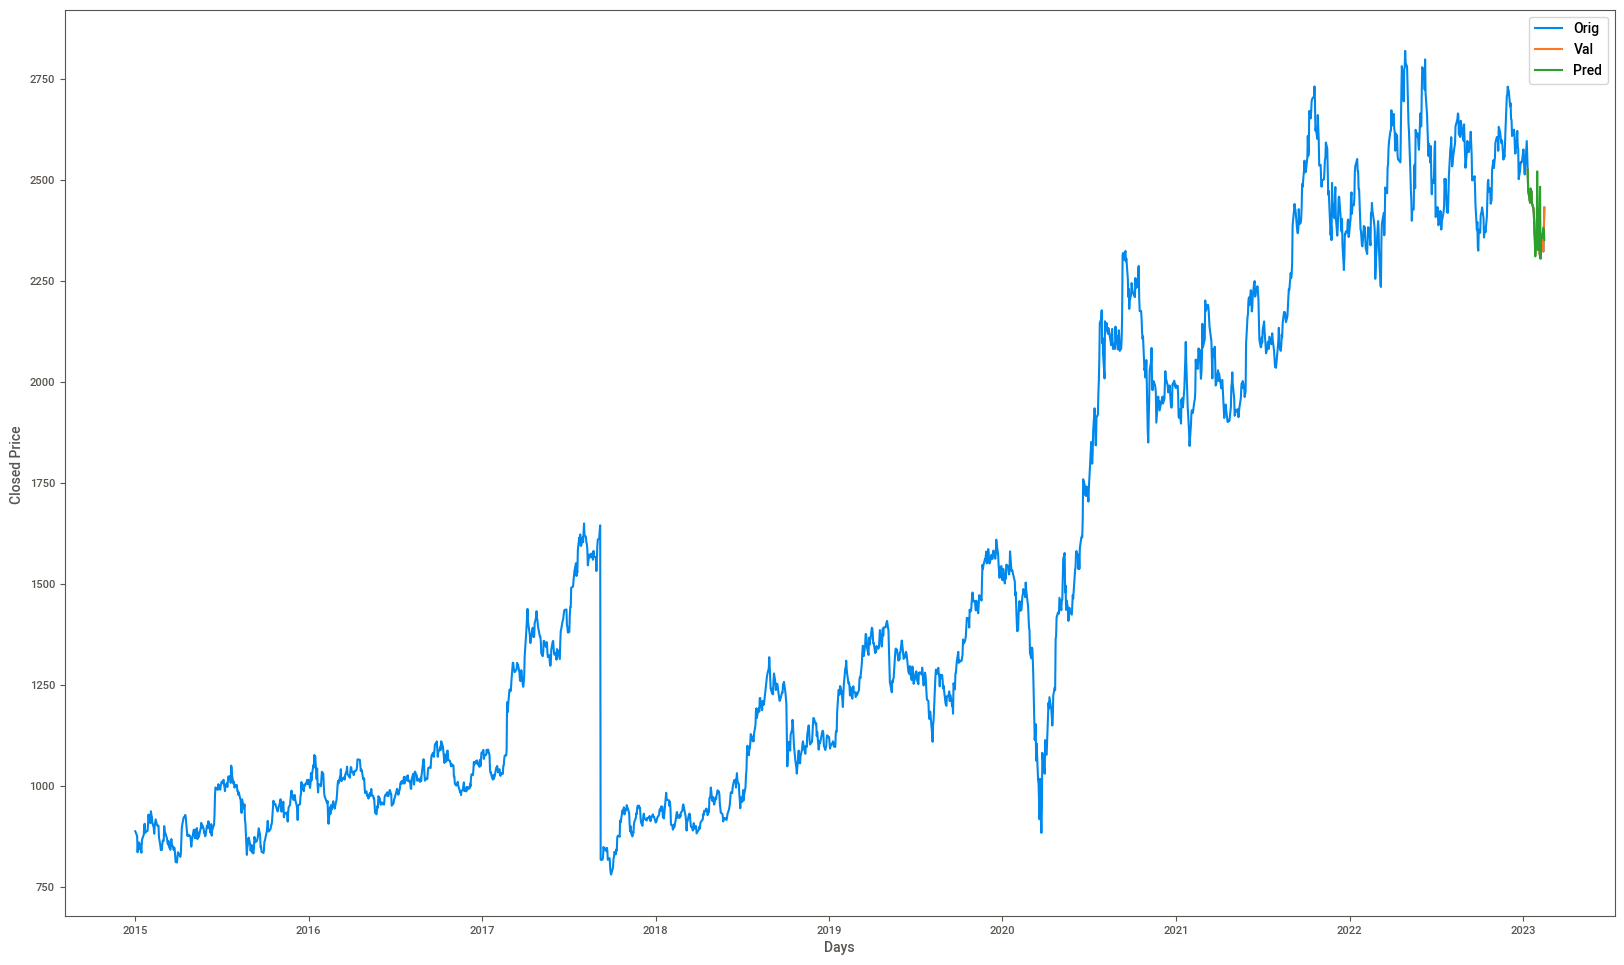

In [ ]:
# Visualize the data using Decision Tree
predictions1=tree_prediction
valid1=df[X1.shape[0]:]
valid1['Predictions']=predictions1
plt.figure(figsize=(20,12))
plt.xlabel('Days')
plt.ylabel('Closed Price ')
plt.plot(df['Close'])
plt.plot(valid1[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [ ]:
# Show the valid and the predicted price
valid1.drop(['Prediction'],axis=1)

Close  Predictions
Date                            
2023-01-11  2526.15      2526.15
2023-01-12  2471.60      2471.60
2023-01-13  2467.60      2467.60
2023-01-16  2444.10      2444.10
2023-01-17  2478.80      2478.80
2023-01-18  2474.70      2474.70
2023-01-19  2472.05      2472.05
2023-01-20  2442.65      2442.65
2023-01-23  2430.30      2430.30
2023-01-24  2415.95      2415.95
2023-01-25  2382.55      2382.55
2023-01-27  2337.35      2311.25
2023-01-30  2359.75      2359.75
2023-01-31  2353.85      2521.70
2023-02-01  2339.90      2339.90
2023-02-02  2326.95      2326.95
2023-02-03  2329.00      2329.00
2023-02-06  2311.45      2483.60
2023-02-07  2305.90      2305.90
2023-02-08  2351.95      2351.95
2023-02-09  2356.05      2356.05
2023-02-10  2336.65      2356.05
2023-02-13  2323.35      2381.85
2023-02-14  2378.10      2375.25
2023-02-15  2431.95      2351.95

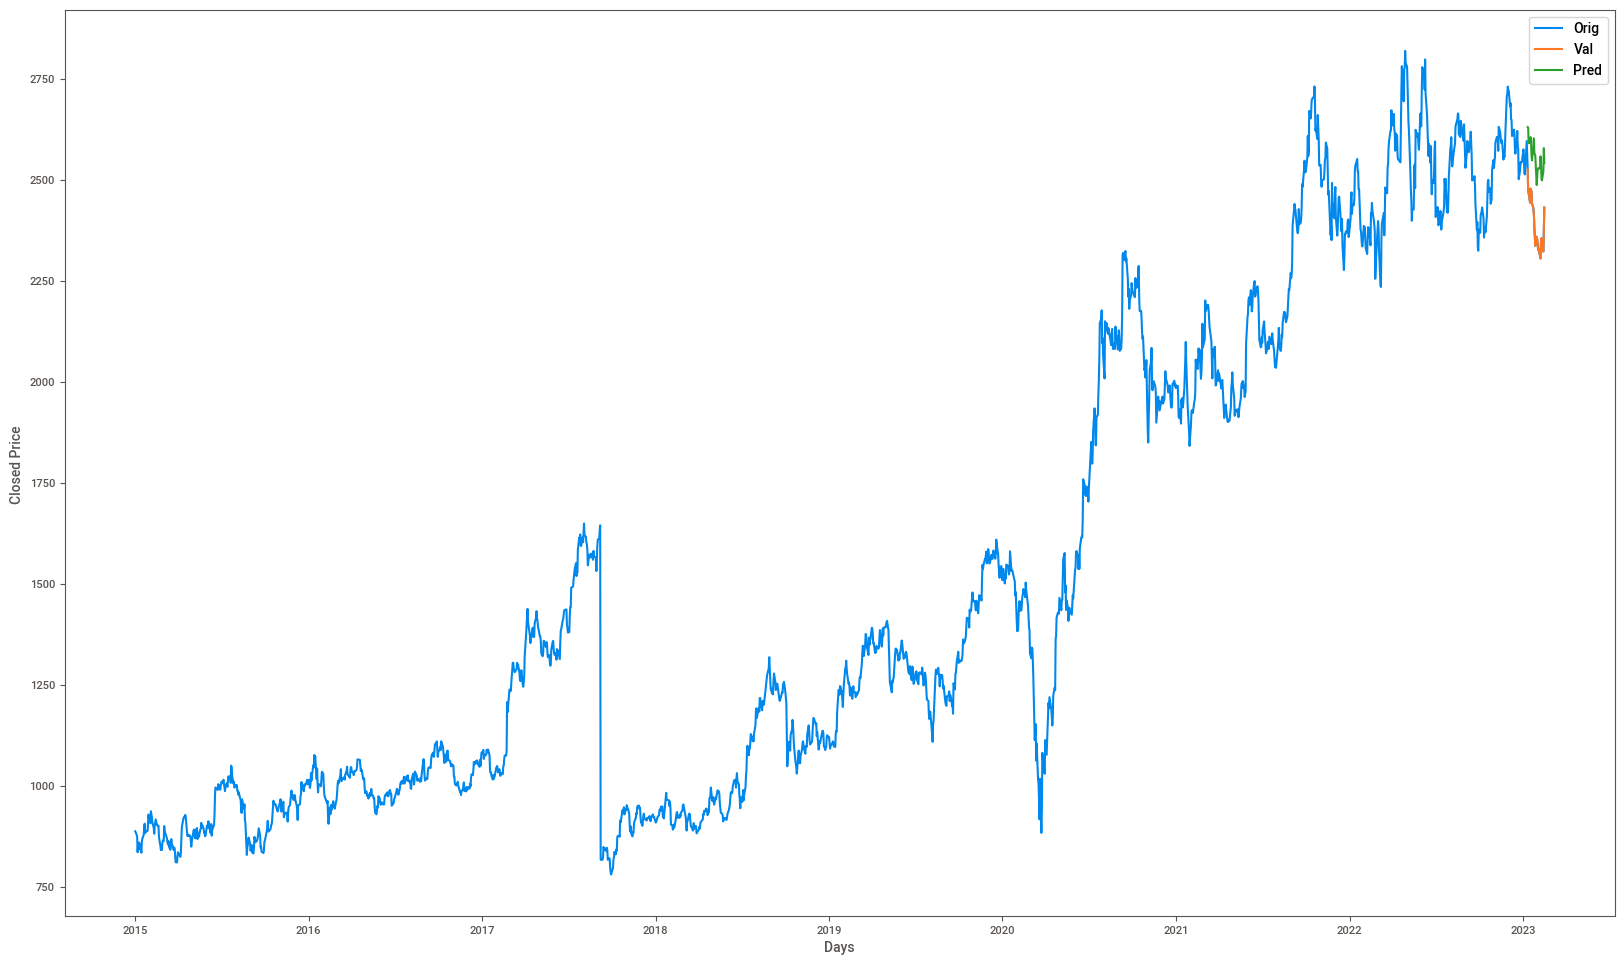

In [ ]:
# Visualize the data using Linear Regression
predictions1=lr_prediction
valid1=df[X1.shape[0]:]
valid1['Predictions']=predictions1
plt.figure(figsize=(20,12))
plt.xlabel('Days')
plt.ylabel('Closed Price ')
plt.plot(df['Close'])
plt.plot(valid1[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [ ]:
# Show the valid and the predicted price
valid1.drop(['Prediction'],axis=1)

Close  Predictions
Date                            
2023-01-11  2526.15  2631.104589
2023-01-12  2471.60  2629.896243
2023-01-13  2467.60  2591.084163
2023-01-16  2444.10  2594.950871
2023-01-17  2478.80  2606.454327
2023-01-18  2474.70  2597.270896
2023-01-19  2472.05  2561.358847
2023-01-20  2442.65  2549.033716
2023-01-23  2430.30  2581.610729
2023-01-24  2415.95  2603.360961
2023-01-25  2382.55  2567.303910
2023-01-27  2337.35  2560.827175
2023-01-30  2359.75  2487.746397
2023-01-31  2353.85  2508.868289
2023-02-01  2339.90  2528.830168
2023-02-02  2326.95  2528.588499
2023-02-03  2329.00  2527.476820
2023-02-06  2311.45  2531.246860
2023-02-07  2305.90  2558.990489
2023-02-08  2351.95  2540.768628
2023-02-09  2356.05  2503.551566
2023-02-10  2336.65  2499.201519
2023-02-13  2323.35  2521.290088
2023-02-14  2378.10  2579.194037
2023-02-15  2431.95  2542.073642

In [ ]:
from sklearn import metrics

In [ ]:
y1_pred=lr.predict(x1_test) # Linear Regression

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("R^2 Score :          ", metrics.r2_score(y1_test, y1_pred))

Mean Absolute Error: 109.6904210711268
Mean Squared Error: 26676.122655458
Root Mean Squared Error: 163.32826655376587
R^2 Score :           0.9253201445304193


In [ ]:
y2_pred=tree.predict(x1_test) # Decision Tree

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y2_pred)))
print("R^2 Score :          ", metrics.r2_score(y1_test, y2_pred))

Mean Absolute Error: 139.17498326639895
Mean Squared Error: 46492.663765757476
Root Mean Squared Error: 215.62157537166237
R^2 Score :           0.8698437004782557


# **Monte Carlo Method To Analyze the Risk**

In [ ]:
closing_df=reliance.filter(['Close'])
tech_returns=closing_df.pct_change()

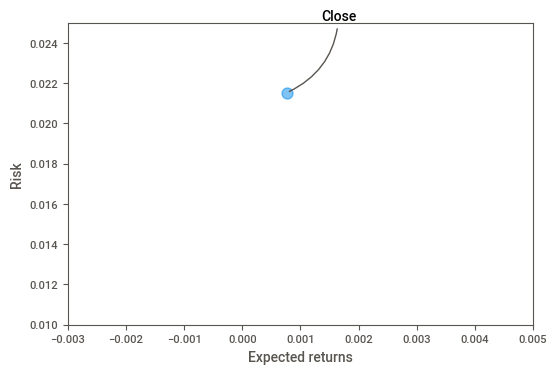

In [ ]:
# Let's start by defining a new DataFrame as a cleaned version of the orignal tech_returns DataFrame
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Set the x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.005])

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.


Value at risk using the "bootstrap" method.
For this method we will calculate the empirical quantiles from a histogram of daily returns.

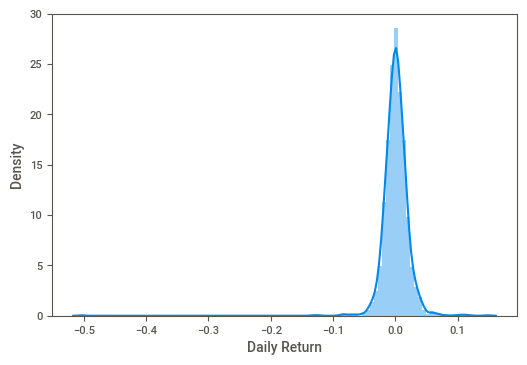

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(reliance['Daily Return'].dropna(), bins=100)
plt.show()

In [ ]:
'''A pure python RETS client for real estate data. Make requests to the MLS server to get real estate listings, media, 
and metadata'''

rets.head()

Close
Date                
2015-01-02 -0.002647
2015-01-05 -0.010954
2015-01-06 -0.045384
2015-01-07  0.021768
2015-01-08 -0.014339

In [ ]:
# The 0.05 empirical quantile of daily returns
emp = rets['Close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.025294288085068728


The 0.05 empirical quantile of daily returns is at -0.025. That means that with 95% confidence, our worst daily loss will not exceed 2.5%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.025 * 1,000,000 = $25,000.

Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

Firstly, for specifying a model, We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH) - past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation: GBM Equation
ΔS = S × (μΔt + σϵ √Δt)

Where, S is the stock price, 
 µ is the expected return (which we calculated earlier), 
 σ is the standard deviation of the returns, t is time, and 
 ε is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price. Now GBM Equation

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be. This is simply a way of scaling the standard deviation.

Secondly, to demonstrate a basic Monte Carlo method, we will start with just a few simulations.

In [ ]:
# Set up our time
days = 365

# Now set delta t
deltaT = 1/days

# Now let's grab our mu (drift) from the expected return data we got for close
mu = rets.mean()['Close']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['Close']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we have already calculated from our daily returns

In [ ]:
def monte_carlo_simulation(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, number days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1, days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * deltaT, scale=sigma * np.sqrt(deltaT))
        # Calculate Drift
        drift[x] = mu * deltaT
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Now let's put our function to work!

In [ ]:
reliance.head

<bound method NDFrame.head of               Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                          
2015-01-01  RELIANCE     EQ      891.15   886.30   892.00   883.65   888.00   
2015-01-02  RELIANCE     EQ      887.90   888.10   896.05   884.30   884.95   
2015-01-05  RELIANCE     EQ      885.55   885.00   890.90   874.10   875.55   
2015-01-06  RELIANCE     EQ      875.85   870.00   873.00   832.00   832.50   
2015-01-07  RELIANCE     EQ      836.10   837.10   858.80   837.00   858.00   
...              ...    ...         ...      ...      ...      ...      ...   
2023-02-09  RELIANCE     EQ     2351.95  2353.45  2370.85  2334.00  2353.60   
2023-02-10  RELIANCE     EQ     2356.05  2354.90  2354.90  2321.30  2336.50   
2023-02-13  RELIANCE     EQ     2336.65  2340.20  2350.00  2313.55  2324.60   
2023-02-14  RELIANCE     EQ     2323.35  2329.95  2381.90  2323.65  2380.00   
2023-02-15  RELIANCE  

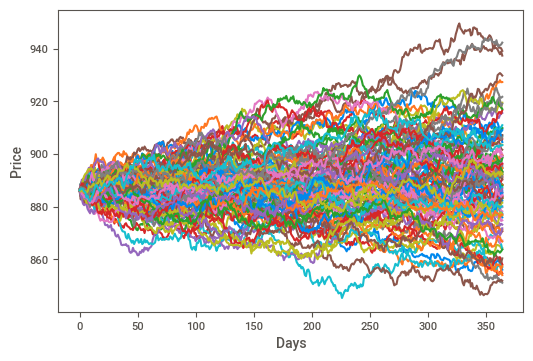

In [ ]:
# Get start price(stock open price) from reliance.head()
start_price = 886.30

for run in range(100):
    plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

Get a histogram of the end results for a much larger run.

In [ ]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo_simulation(start_price, days, mu, sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.



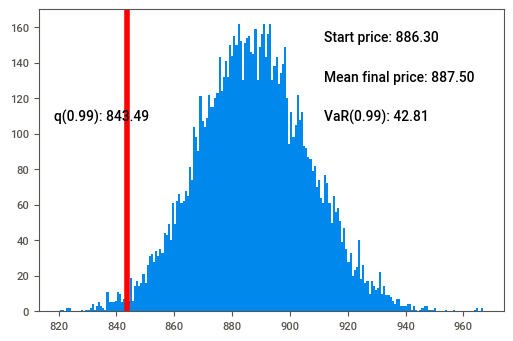

In [ ]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Use plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: %.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: %.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): %.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): %.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Reliance stock, which looks to be 43.21 Rs for every investment of 886.30 Rs (the price of one inital reliance stock).

This means for every initial stock you purchase, you are putting about Rs.43.21 at risk 99% of the time from our Monte Carlo Simulation.

# **LSTM Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [ ]:
import math
# Create a new dataframe with only Close column
data=reliance.filter(['Close'])
# Convert the dataframe to a numpy array
dataset=data.values
# Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1612

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.05247799],
       [0.05132544],
       [0.04656809],
       ...,
       [0.75649231],
       [0.78334437],
       [0.80975502]])

In [ ]:
# Create the training dataset
# Create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
# Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.05247799, 0.05132544, 0.04656809, ..., 0.0313887 , 0.02373771,
       0.01510581])]
[0.014639888177738536]

[array([0.05247799, 0.05132544, 0.04656809, ..., 0.0313887 , 0.02373771,
       0.01510581]), array([0.05132544, 0.04656809, 0.02707276, ..., 0.02373771, 0.01510581,
       0.01463989])]
[0.014639888177738536, 0.022119228034037153]



In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
# Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1552, 60, 1)

In [ ]:
# Build the LSTM Model
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train,y_train, batch_size=1,epochs=1)

1552/1552 [==============================] - 46s 28ms/step - loss: 0.0018


In [ ]:
model.save('keras_model.h5')

In [ ]:
# Create testing dataset
# Create a new array containing 
test_data=scaled_data[training_data_len-60:,:]
# Create the datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range (60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
# Convert the data to numpy array
x_test=np.array(x_test)

In [ ]:
# Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


13/13 [==============================] - 2s 22ms/step


In [ ]:
# Get the Root mean squared error RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

5.6439125174906755

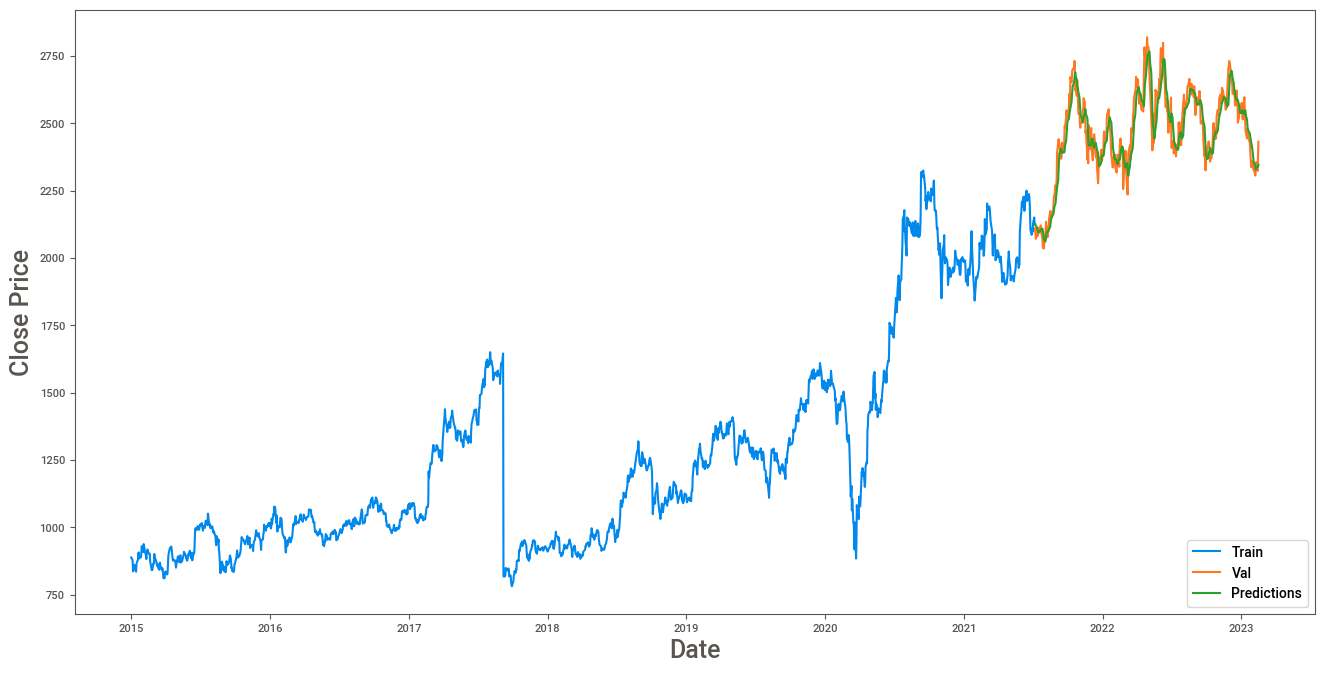

In [ ]:
# Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
# Show the valid and the predicted prices
valid

Close  Predictions
Date                            
2021-07-07  2110.05  2124.546387
2021-07-08  2092.60  2125.671875
2021-07-09  2071.20  2121.652344
2021-07-12  2084.10  2112.310059
2021-07-13  2099.70  2104.617432
...             ...          ...
2023-02-09  2356.05  2329.696777
2023-02-10  2336.65  2335.829590
2023-02-13  2323.35  2339.284912
2023-02-14  2378.10  2338.738281
2023-02-15  2431.95  2346.463867

[402 rows x 2 columns]

In [ ]:
# Get the quote
reliance_quote=get_history(symbol="RELIANCE",start=start_date,end=end_date)
# Create a new dataframe
new_df=reliance_quote.filter(['Close'])
# Get the last 60 days closing price values and covert the dataframe to an array
last_60_days=new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
# Create an empty list
X_test=[]
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test dataset to a numpy array
X_test=np.array(X_test)
# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price=model.predict(X_test)
# Undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 28ms/step
[[2365.5356]]


In [ ]:
# Get the quote
reliance_quote2=get_history(symbol="RELIANCE",start=date(2023,2,15),end=date(2023,2,15))
print(reliance_quote2['Close'])

Date
2023-02-15    2431.95
Name: Close, dtype: float64


# **ARIMA Model**

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.9 MB/s eta 0:00:00


In [ ]:
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import DataFrame
from pandas import Grouper
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df_arima=reliance[["Close"]].copy()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

In [ ]:
result=adfuller(df_arima.Close.dropna())
print(f"ADF statistics:{result[0]}")
print(f"p-value: {result[1]}")

ADF statistics:-1.0143926468563214
p-value: 0.7479787850409871


In [ ]:
#data is non stationary

In [ ]:
from pmdarima.arima import auto_arima
from pmdarima.arima.utils import ndiffs

In [ ]:
#ndiffs arima package to get num of diff(d)

In [ ]:
ndiffs(df_arima.Close,test="adf")

1

In [ ]:
#Autocorrelation function(ACF)

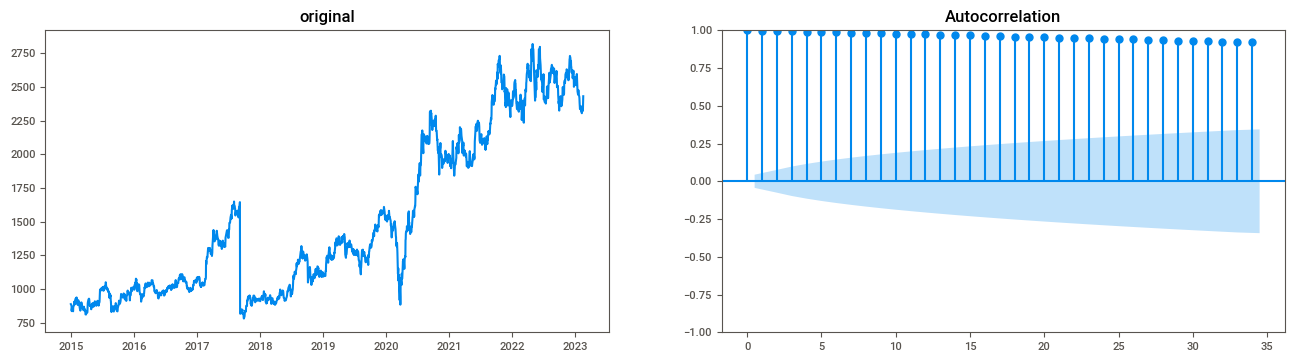

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(df_arima.Close)
ax1.set_title("original")
plot_acf(df_arima.Close,ax=ax2);

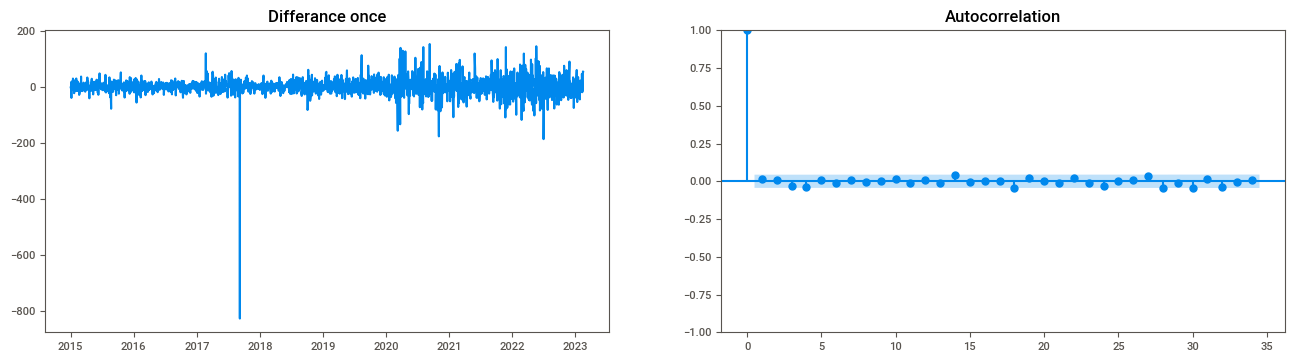

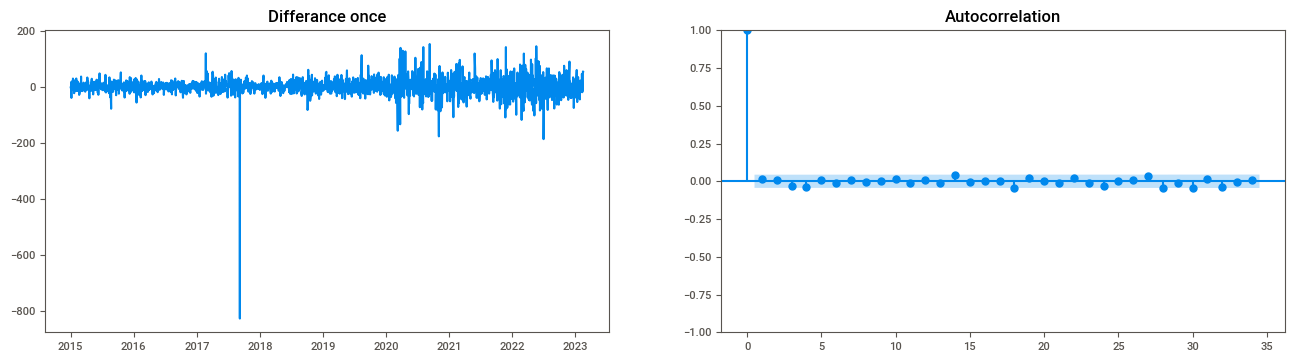

In [ ]:
diff=df_arima.Close.diff().dropna()
fig,(ax1, ax2)= plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Differance once")
plot_acf(diff,ax=ax2)

In [ ]:
#finding value of p (  p is the number of autoregressive terms) by pacf plot

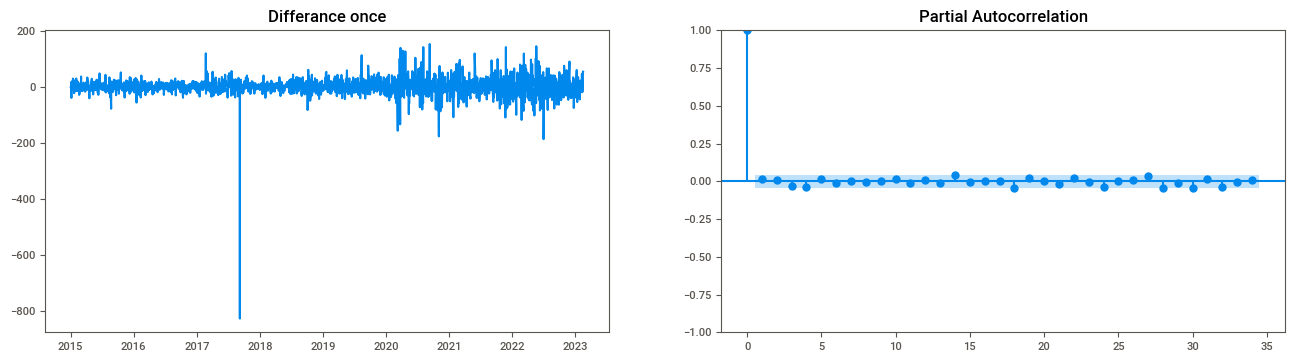

In [ ]:
diff=df_arima.Close.diff().dropna()
fig,(ax1, ax2)= plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Differance once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

In [ ]:
##finding value of q(q is the number of lagged forecast errors in the prediction equation.) by using acf plot

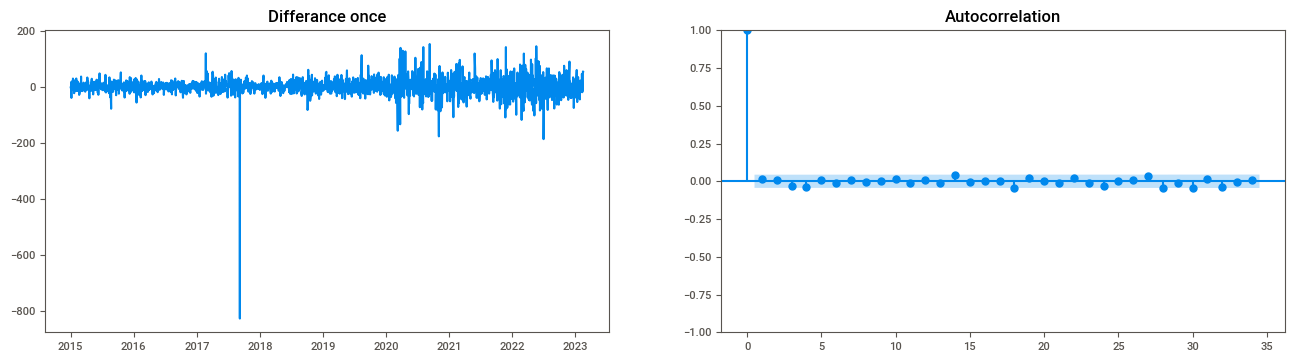

In [ ]:
diff=df_arima.Close.diff().dropna()
fig,(ax1, ax2)= plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Differance once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

In [ ]:
#Train test split

In [ ]:
n=int(len(df_arima)*0.8)
train_arima=df.Close[:n]
test_arima=df.Close[n:]

In [ ]:
print(len(train_arima))
print(len(test_arima))

1611
403


In [ ]:
#fitting ARIMA model

In [ ]:
model_arima=ARIMA(train_arima,order=(1,1,1))
result=model_arima.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1611
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7878.889
Date:                Tue, 14 Mar 2023   AIC                          15763.778
Time:                        13:06:28   BIC                          15779.930
Sample:                             0   HQIC                         15769.774
                               - 1611                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1725      4.048     -0.043      0.966      -8.106       7.761
ma.L1          0.1785      4.039      0.044      0.965      -7.739       8.096
sigma2      1044.0065      3.516    296.904      0.0

(array([3.61888968e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.61888968e-06]),
 array([-827.35666292, -655.83099663, -484.30533034, ...,  544.84866742,
         716.37433371,  887.9       ]),
 <BarContainer object of 10 artists>)

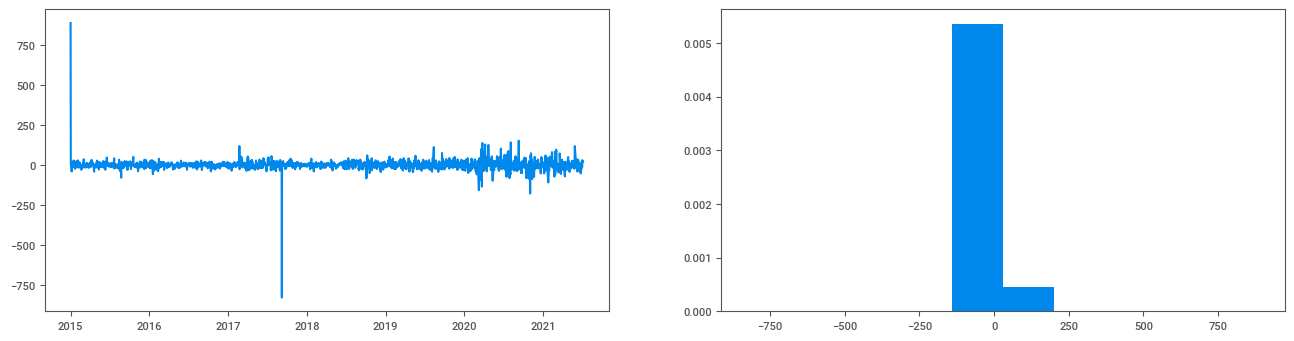

In [ ]:
#plot residue errors
residuals=pd.DataFrame(result.resid)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<AxesSubplot:xlabel='Date'>

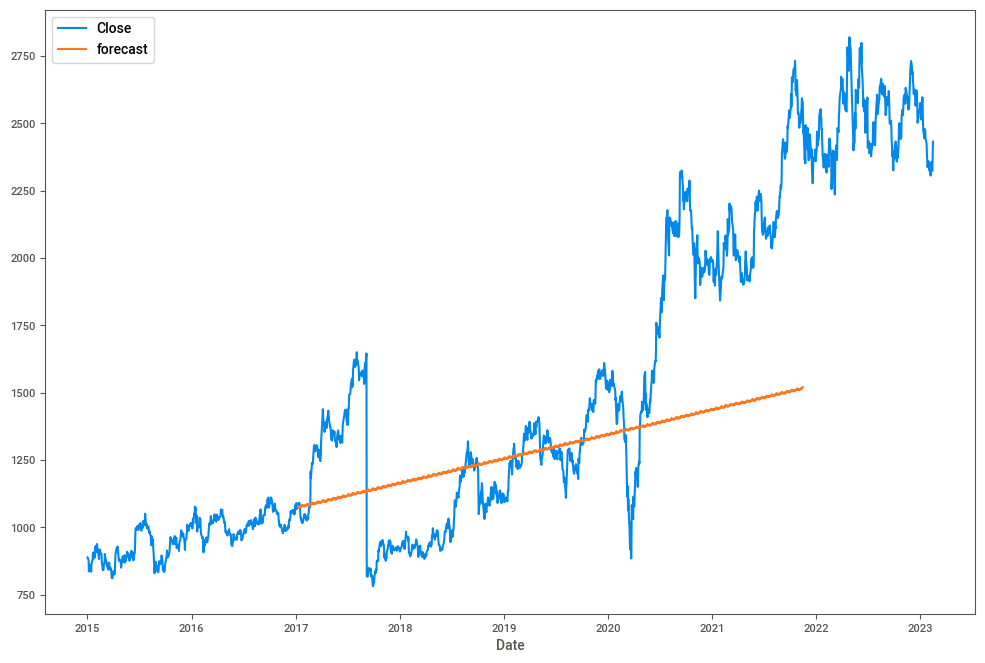

In [ ]:
import statsmodels.api as sm
model_arima=sm.tsa.statespace.SARIMAX(df_arima['Close'],order=(0, 1, 0),seasonal_order=(1,1,1,12))
results=model_arima.fit()
df_arima['forecast']=results.predict(start=500,end=1700,dynamic=True)
df_arima[['Close','forecast']].plot(figsize=(12,8))

In [ ]:
step=403
fc= results.forecast(step)
fc

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



2014    2434.274598
2015    2435.267491
2016    2435.754087
2017    2439.387566
2018    2440.118288
           ...     
2412    2740.976268
2413    2744.623051
2414    2745.507357
2415    2749.528730
2416    2746.008740
Name: predicted_mean, Length: 403, dtype: float64

In [ ]:
rmse_arima=np.sqrt(mean_squared_error(test_arima,fc))

In [ ]:
rmse_arima

190.35545117594307

# **CNN Model**

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

In [ ]:
# Preprocessing
scaler_cnn = MinMaxScaler(feature_range=(0, 1))
reliance['Close'] = scaler_cnn.fit_transform(np.array(reliance['Close']).reshape(-1, 1))

In [ ]:
# Split data into training and testing sets
train_size_cnn = int(len(reliance) * 0.8)
train_data_cnn = reliance[:train_size_cnn]
test_data_cnn = reliance[train_size_cnn:]

In [ ]:
# Create training and testing data
def create_dataset(data, lookback=1):
    X, Y = [], []
    for i in range(len(data)-lookback-1):
        X.append(data[i:(i+lookback), 0])
        Y.append(data[i + lookback, 0])
    return np.array(X), np.array(Y)

In [ ]:
lookback = 60  # Number of previous days used to predict the next day's price
train_X_cnn, train_Y_cnn = create_dataset(train_data_cnn[['Close']].values, lookback)
test_X_cnn, test_Y_cnn = create_dataset(test_data_cnn[['Close']].values, lookback)

In [ ]:
# Reshape data for CNN input
train_X_cnn = train_X_cnn.reshape((train_X_cnn.shape[0], train_X_cnn.shape[1], 1))
test_X_cnn = test_X_cnn.reshape((test_X_cnn.shape[0], test_X_cnn.shape[1], 1))

In [ ]:
# Build CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(lookback, 1)))
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1, activation='linear'))

In [ ]:
# Compile model
model_cnn.compile(loss='mse', optimizer=Adam(lr=0.001))

In [ ]:
# Train model
model_cnn.fit(train_X_cnn, train_Y_cnn, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
25/25 [==============================] - 1s 15ms/step - loss: 0.0110
Epoch 2/50
25/25 [==============================] - 0s 13ms/step - loss: 0.0029
Epoch 3/50
25/25 [==============================] - 0s 14ms/step - loss: 0.0015
Epoch 4/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0011
Epoch 5/50
25/25 [==============================] - 1s 20ms/step - loss: 8.1271e-04
Epoch 6/50
25/25 [==============================] - 0s 15ms/step - loss: 6.9554e-04
Epoch 7/50
25/25 [==============================] - 0s 14ms/step - loss: 6.0812e-04
Epoch 8/50
25/25 [==============================] - 0s 13ms/step - loss: 5.5164e-04
Epoch 9/50
25/25 [==============================] - 0s 14ms/step - loss: 5.4551e-04
Epoch 10/50
25/25 [==============================] - 0s 14ms/step - loss: 4.7804e-04
Epoch 11/50
25/25 [==============================] - 0s 14ms/step - loss: 5.0101e-04
Epoch 12/50
25/25 [==============================] - 0s 16ms/step - loss: 4.4443e-04
Epoch

In [ ]:
# Predict test data
predictions_cnn = model_cnn.predict(test_X_cnn)

11/11 [==============================] - 0s 6ms/step


In [ ]:
# Reverse scaling of predictions and test data
predictions_cnn = scaler_cnn.inverse_transform(predictions_cnn)
test_Y_cnn = scaler_cnn.inverse_transform([test_Y_cnn])

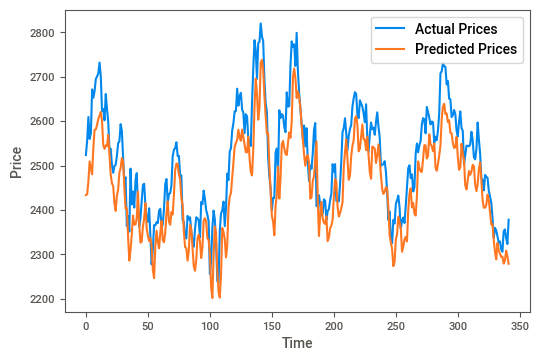

In [ ]:
#Plot predictions
plt.plot(test_Y_cnn[0], label='Actual Prices')
plt.plot(predictions_cnn[:,0], label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate MAE
mae = mean_absolute_error(test_Y_cnn[0], predictions_cnn[:,0])
print("Mean Absolute Error: {}".format(mae))

Mean Absolute Error: 64.71942117256032


In [ ]:
# Calculate accuracy metrics
mae = mean_absolute_error(test_Y_cnn[0], predictions_cnn[:, 0])
mse = mean_squared_error(test_Y_cnn[0], predictions_cnn[:, 0])
rmse = np.sqrt(mse)
r2 = r2_score(test_Y_cnn[0], predictions_cnn[:, 0])

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

Mean Absolute Error (MAE): 64.7194
Mean Squared Error (MSE): 5839.9870
Root Mean Squared Error (RMSE): 76.4198
R-squared (R2): 0.5979


# **XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
## Drop columns 'Symbol' and 'Series' from the DataFrame
reliance_xgb = reliance.drop(['Symbol', 'Series'], axis=1)

In [ ]:
train_size_xgb = int(len(reliance_xgb) * 0.8)
train_data_xgb, test_data_xgb = reliance_xgb[:train_size_xgb], reliance_xgb[train_size_xgb:]

In [ ]:
# Scale the data using MinMaxScaler
scaler_xgb = MinMaxScaler()
train_data_xgb = pd.DataFrame(scaler.fit_transform(train_data_xgb), columns=train_data_xgb.columns)
test_data_xgb = pd.DataFrame(scaler.transform(test_data_xgb), columns=test_data_xgb.columns)

In [ ]:
# Prepare the data for training
train_labels_xgb = train_data_xgb['Close'].values
train_features_xgb = train_data_xgb.drop(['Close'], axis=1).values

In [ ]:
## converting the data into DMatrix format, which is required by XGBoost

In [ ]:
dtrain_xgb = xgb.DMatrix(train_features_xgb, label=train_labels_xgb)

In [ ]:
# Train the XGBoost model
params = {'objective': 'reg:squarederror', 'max_depth': 3}
num_rounds = 10

In [ ]:
bst = xgb.train(params, dtrain_xgb, num_rounds)

In [ ]:
# Prepare the data for testing
test_labels_xgb = test_data_xgb['Close'].values
test_features_xgb = test_data_xgb.drop(['Close'], axis=1).values

In [ ]:
# Create a DMatrix from the test data
dtest_xgb = xgb.DMatrix(test_features_xgb)

In [ ]:
# Make predictions on the test data
predictions_xgb = bst.predict(dtest_xgb)

In [ ]:
# Calculate the accuracy of the predictions
mse = np.mean((predictions_xgb - test_labels_xgb) **2)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 0.1731366668485665


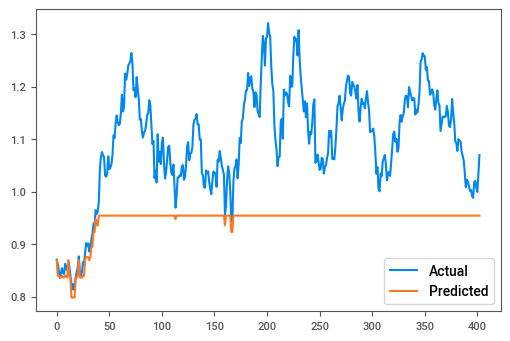

In [ ]:
# Plot the actual vs. predicted values
plt.plot(test_labels_xgb, label='Actual')
plt.plot(predictions_xgb, label='Predicted')
plt.legend()
plt.show()

# **FB Prophet Model**

In [ ]:
# Import Prophet class from fbprophet package for time series forecasting #
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
reliance_prophet = reliance.reset_index()
reliance_prophet = reliance_prophet[['Date','Close']]
reliance_prophet.rename(columns ={'Date':'ds', 'Close':'y'} , inplace = True)
reliance_prophet['ds'] = pd.to_datetime(reliance_prophet['ds'])

print("Min ",reliance_prophet['ds'].min(),\
     "Max ", reliance_prophet['ds'].max())

Min  2015-01-01 00:00:00 Max  2023-02-15 00:00:00


In [ ]:
import matplotlib.dates as mdates

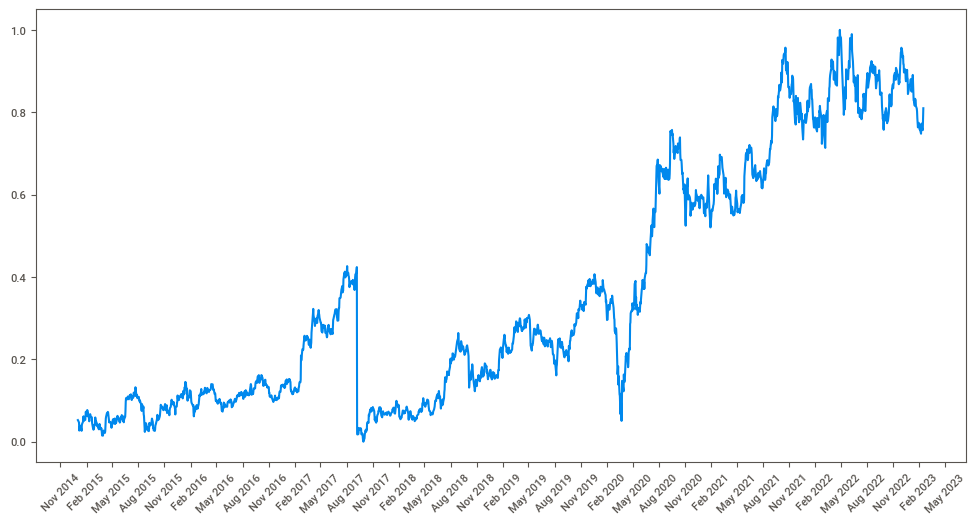

In [ ]:
# Set the figure size #
plt.figure(figsize=(12,6))

# plot data #
plt.plot(reliance_prophet['ds'],reliance_prophet['y'])

# Set the x-axis label rotation #
plt.xticks(rotation=45)

# Set the x-axis tick interval to every 3 months #
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Format the x-axis tick labels as Month-Year format #
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

In [ ]:
# Create a new instance of the Prophet class and fit it to the historical stock price data in the DataFrame #
m = Prophet()
m.fit(reliance_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpguuve3no/j73x5xc7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpguuve3no/lsh5q2ws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29369', 'data', 'file=/tmp/tmpguuve3no/j73x5xc7.json', 'init=/tmp/tmpguuve3no/lsh5q2ws.json', 'output', 'file=/tmp/tmpguuve3no/prophet_modelrelhq_l4/prophet_model-20230314130723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Use the Prophet model to generate 60 days of daily forecasts for the stock price time series #
future_prophet = m.make_future_dataframe(periods=60,freq='D')
forecast_prophet = m.predict(future_prophet)
forecast_prophet.tail(28)

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2046 2023-03-20  0.933741    0.828475    0.994864     0.933673     0.934124   
2047 2023-03-21  0.934098    0.817957    0.990951     0.933974     0.934528   
2048 2023-03-22  0.934455    0.832719    0.997398     0.934258     0.934902   
2049 2023-03-23  0.934812    0.822290    0.997065     0.934581     0.935308   
2050 2023-03-24  0.935169    0.823837    0.998434     0.934857     0.935701   
2051 2023-03-25  0.935526    0.833266    1.002892     0.935108     0.936114   
2052 2023-03-26  0.935883    0.820170    0.994906     0.935346     0.936547   
2053 2023-03-27  0.936241    0.833939    1.000875     0.935597     0.937003   
2054 2023-03-28  0.936598    0.834011    1.005748     0.935898     0.937441   
2055 2023-03-29  0.936955    0.833399    1.007475     0.936293     0.937836   
2056 2023-03-30  0.937312    0.833507    1.010138     0.936628     0.938269   
2057 2023-03-31  0.937669    0.837212    1.008567     0.936922     0.938668   
2058 2023-04-01  0.938026    0.836230    1.010102     0.937176     0.939126   
2059 2023-04-02  0.938383    0.827417    1.011483     0.937504     0.939532   
2060 2023-04-03  0.938740    0.841900    1.016823     0.937776     0.940014   
2061 2023-04-04  0.939097    0.840025    1.019418     0.938013     0.940409   
2062 2023-04-05  0.939454    0.838131    1.015400     0.938317     0.940843   
2063 2023-04-06  0.939812    0.844248    1.018655     0.938613     0.941321   
2064 2023-04-07  0.940169    0.845552    1.016632     0.938820     0.941714   
2065 2023-04-08  0.940526    0.850422    1.023869     0.939109     0.942180   
2066 2023-04-09  0.940883    0.846520    1.011956     0.939330     0.942665   
2067 2023-04-10  0.941240    0.841739    1.017317     0.939634     0.943347   
2068 2023-04-11  0.941597    0.854933    1.021406     0.939931     0.943916   
2069 2023-04-12  0.941954    0.860448    1.027528     0.940182     0.944415   
2070 2023-04-13  0.942311    0.854007    1.034823     0.940443     0.944825   
2071 2023-04-14  0.942668    0.850385    1.028290     0.940711     0.945313   
2072 2023-04-15  0.943025    0.865735    1.028592     0.941081     0.945725   
2073 2023-04-16  0.943382    0.852538    1.016907     0.941386     0.946212   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2046       -0.023541             -0.023541             -0.023541  0.000212   
2047       -0.023243             -0.023243             -0.023243  0.000471   
2048       -0.021505             -0.021505             -0.021505  0.002021   
2049       -0.021939             -0.021939             -0.021939  0.001254   
2050       -0.023159             -0.023159             -0.023159 -0.000435   
2051       -0.019197             -0.019197             -0.019197  0.002931   
2052       -0.027871             -0.027871             -0.027871 -0.006454   
2053       -0.020391             -0.020391             -0.020391  0.000212   
2054       -0.019227             -0.019227             -0.019227  0.000471   
2055       -0.016697             -0.016697             -0.016697  0.002021   
2056       -0.016422             -0.016422             -0.016422  0.001254   
2057       -0.017019             -0.017019             -0.017019 -0.000435   
2058       -0.012527             -0.012527             -0.012527  0.002931   
2059       -0.020764             -0.020764             -0.020764 -0.006454   
2060       -0.012938             -0.012938             -0.012938  0.000212   
2061       -0.011517             -0.011517             -0.011517  0.000471   
2062       -0.008814             -0.008814             -0.008814  0.002021   
2063       -0.008445             -0.008445             -0.008445  0.001254   
2064       -0.009020             -0.009020             -0.009020 -0.000435   
2065       -0.004571             -0.004571             -0.004571  0.002931   
2066       -0.012908             -0.012908             -0.012908 -0.006454   
2067 

In [ ]:
#Use plotly to create an interactive plot of the Prophet model forecast for the stock price time series #
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast_prophet)

In [ ]:
# Use plotly to create interactive plots of the trend, seasonality, and other components of the Prophet model forecast for the stock price time series #

plot_components_plotly(m, forecast_prophet)

# **Deployment Using Streamlit** 
***Model used is LSTM***

In [ ]:
# RUN STREAMLIT FROM GOOGLE COLAB #
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.2 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=feb906a20bf97abdb78a67ccbc0ea0749e87d43113a5

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile app.py
import pandas as  pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import datetime as dt
from datetime import timedelta
from datetime import date

from nsepy import get_history
from datetime import date
from keras.models import load_model

start_date=date(2015,1,1)
end_date=date(2023,2,15)

st.title('Stock Price Prediction')
user_input=st.text_input('Enter Stock Ticker','RELIANCE')
reliance=get_history(symbol=user_input,start=start_date,end=end_date)

st.subheader('Data from 2015 to 2023')
st.write(reliance.describe())

#visualization
st.subheader('Closing price Vs Time Chart')
fig=plt.figure(figsize=(12,6))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(reliance.Close)
st.pyplot(fig)

st.subheader('Closing price Vs Time Chart with 100MA')
ma100=reliance.Close.rolling(100).mean()
fig=plt.figure(figsize=(12,6))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(ma100)
plt.plot(reliance.Close)
st.pyplot(fig)

st.subheader('Closing price Vs Time Chart with 100MA and 200MA')
ma100=reliance.Close.rolling(100).mean()
ma200=reliance.Close.rolling(200).mean()
fig=plt.figure(figsize=(12,6))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(ma100)
plt.plot(ma200)
plt.plot(reliance.Close)
st.pyplot(fig)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

import math
# Create a new dataframe with only Close column
data=reliance.filter(['Close'])
# Convert the dataframe to a numpy array
dataset=data.values
# Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

# Create the training dataset
# Create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]

#load my model
model=load_model('keras_model.h5')

# Create testing dataset
# Create a new array containing 
test_data=scaled_data[training_data_len-60:,:]
# Create the datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range (60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

# Convert the data to numpy array
x_test=np.array(x_test)

# Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

# Plot the data
st.subheader('Predictions Vs Original')
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
# Visualize the data
fig2=plt.figure(figsize=(16,8))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
st.pyplot(fig2)

st.subheader('Stock Price Prediction by Date')

df1=reliance.reset_index()['Close']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
#datemax="24/06/2022"
datemax=dt.datetime.strftime(dt.datetime.now() - timedelta(1), "%d/%m/%Y")
datemax =dt.datetime.strptime(datemax,"%d/%m/%Y")
x_input=df1[:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

date1 = st.date_input("Enter Date in this format yyyy-mm-dd")

result = st.button("Predict")
#st.write(result)
if result:
	from datetime import datetime
	my_time = datetime.min.time()
	date1 = datetime.combine(date1, my_time)
	#date1=str(date1)
	#date1=dt.datetime.strptime(time_str,"%Y-%m-%d")

	nDay=date1-datemax
	nDay=nDay.days

	date_rng = pd.date_range(start=datemax, end=date1, freq='D')
	date_rng=date_rng[1:date_rng.size]
	lst_output=[]
	n_steps=x_input.shape[1]
	i=0

	while(i<=nDay):
    
	    if(len(temp_input)>n_steps):
        	  #print(temp_input)
        	    x_input=np.array(temp_input[1:]) 
        	    print("{} day input {}".format(i,x_input))
        	    x_input=x_input.reshape(1,-1)
        	    x_input = x_input.reshape((1, n_steps, 1))
        		#print(x_input)
        	    yhat = model.predict(x_input, verbose=0)
        	    print("{} day output {}".format(i,yhat))
        	    temp_input.extend(yhat[0].tolist())
        	    temp_input=temp_input[1:]
        	    #print(temp_input)
        	    lst_output.extend(yhat.tolist())
        	    i=i+1
	    else:
        	    x_input = x_input.reshape((1, n_steps,1))
        	    yhat = model.predict(x_input, verbose=0)
        	    print(yhat[0])
        	    temp_input.extend(yhat[0].tolist())
        	    print(len(temp_input))
        	    lst_output.extend(yhat.tolist())
        	    i=i+1
	res =scaler.inverse_transform(lst_output)
#output = res[nDay-1]

	output = res[nDay]

	st.write("*Predicted Price for Date :*", date1, "*is*", np.round(output[0], 2))
	st.success('The Price is {}'.format(np.round(output[0], 2)))

	#st.write("predicted price : ",output)

	predictions=res[res.size-nDay:res.size]
	print(predictions.shape)
	predictions=predictions.ravel()
	print(type(predictions))
	print(date_rng)
	print(predictions)
	print(date_rng.shape)

	@st.cache
	def convert_df(df):
   		return df.to_csv().encode('utf-8')
	df = pd.DataFrame(data = date_rng)
	df['Predictions'] = predictions.tolist()
	df.columns =['Date','Price']
	st.write(df)
	csv = convert_df(df)
	st.download_button(
   		"Press to Download",
   		csv,
  		 "file.csv",
   		"text/csv",
  		 key='download-csv'
	)

  #visualization

	fig =plt.figure(figsize=(10,6))
	xpoints = date_rng
	ypoints =predictions
	plt.xticks(rotation = 90)
	plt.plot(xpoints, ypoints)
	st.pyplot(fig)


Writing app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.496s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



Run Streamlit In Background


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

Expose The Port 8501


In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.691s
your url is: https://puny-memes-teach-34-125-145-195.loca.lt
